In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet
from keras.datasets import mnist
from common.functions import softmax

Using TensorFlow backend.


In [2]:
# データの読み込み
(x_train, t_train), (x_test, t_test) = mnist.load_data()

# 1次元へ整形
x_train, x_test = x_train.reshape(-1, 784), x_test.reshape(-1, 784)

# 正規化
x_train, x_test = x_train.astype(np.float32) / 255.0, x_test.astype(np.float32) / 255.0

In [3]:
x_base = x_train[0].copy()
x_base

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

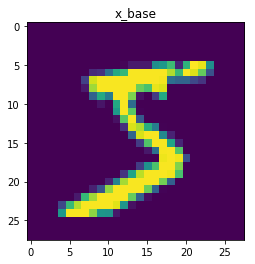

In [4]:
plt.imshow(x_base.reshape(28,28))
plt.title("x_base")
plt.show()

In [5]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# パラメータのロード
network.load_params("params_nn.pkl")
print("loaded Network Parameters!")

loaded Network Parameters!


In [6]:
pred = network.predict(x_base)
pred

array([-0.85297713, -3.66424245, -0.18508496,  9.85418412, -8.86099437,
       13.11292996, -6.54674727, -0.99105145, -2.4386287 ,  0.65709932])

In [7]:
pred_label = np.argmax(pred)
pred_label

5

In [8]:
pred_score = max(softmax(pred))
pred_score

0.9629792385831452

In [9]:
x = x_base.copy().reshape(1, 784)
grads = network.gradient(x, np.array([5]))
grads

{'W1': array([[ 0.,  0., -0., ...,  0.,  0., -0.],
        [ 0.,  0., -0., ...,  0.,  0., -0.],
        [ 0.,  0., -0., ...,  0.,  0., -0.],
        ...,
        [ 0.,  0., -0., ...,  0.,  0., -0.],
        [ 0.,  0., -0., ...,  0.,  0., -0.],
        [ 0.,  0., -0., ...,  0.,  0., -0.]]),
 'b1': array([ 0.59501187,  0.        , -0.08626725,  0.        ,  1.61602834,
        -0.2287034 ,  0.28330339,  0.2175782 , -0.14538351,  0.        ,
         0.        , -0.38700391, -0.17614508,  0.93815647, -0.32504232,
         0.        ,  0.11624453, -0.1421366 ,  0.        ,  0.09995574,
        -0.16060556, -0.23132116,  0.        ,  0.35436002, -0.52916375,
         0.        ,  0.23841823, -0.37942013,  0.        ,  0.        ,
         0.41232297, -0.90519429, -0.04907277,  0.        ,  0.        ,
        -0.29596362,  0.42391619,  0.        ,  0.19562347, -0.01368109,
         0.02194432,  1.15586554,  0.        ,  0.05876006, -0.38063817,
        -0.53019185,  0.45476403,  0.        ,

In [10]:
np.set_printoptions(threshold=np.inf)
print(grads['W1'])

[[ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
   0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
   0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
   0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.0000

In [11]:
print(grads['W1'].shape)

(784, 50)


In [12]:
grads_w1_sum = np.sum(grads['W1'], axis=0)
grads_w1_sum

array([ 64.22628159,   0.        ,  -9.31178871,   0.        ,
       174.43600149, -24.68651402,  30.58010165,  23.48564742,
       -15.69286712,   0.        ,   0.        , -41.77365768,
       -19.01330706, 101.26571447, -35.0854505 ,   0.        ,
        12.54757106, -15.34239226,   0.        ,  10.78934067,
       -17.3359537 , -24.96907819,   0.        ,  38.25003749,
       -57.11855877,   0.        ,  25.73514422, -40.95505528,
         0.        ,   0.        ,  44.50662734, -97.70773783,
        -5.29697269,   0.        ,   0.        , -31.94666196,
        45.75801312,   0.        ,  21.11582766,  -1.47675298,
         2.36869565, 124.76548778,   0.        ,   6.34263027,
       -41.08653255, -57.22953309,  49.08776448,   0.        ,
         1.94712718, -52.60380931])

In [13]:
false_list = [[], [], [], [], [], [], [], [], [], []]
false_list

[[], [], [], [], [], [], [], [], [], []]

In [14]:
true_list = [[], [], [], [], [], [], [], [], [], []]
true_list

[[], [], [], [], [], [], [], [], [], []]

In [15]:
for i, t in enumerate(x_test):
    pre_l = np.argmax(network.predict(t))
    true_l = t_test[i]
    if pre_l == true_l:
        true_list[true_l].append(i)
    else:
        false_list[true_l].append(i)

In [16]:
len(true_list[5])

842

In [17]:
len(false_list[5])

50

In [18]:
def all_g(nums, label):
    li = np.zeros(50)
    for i in nums:
        g = network.gradient(x_test[i].reshape(1, 784), np.array([label]))
        li += np.sum(g['W1'], axis=0)
        
    return li
    

In [19]:
def compare_g(t_nums, f_nums, label):
    t = all_g(t_nums, label)
    f = all_g(f_nums, label)
    
    w = 0.4
    plt.figure(figsize=(30, 10))
    plt.bar(np.arange(50), t, color='b', label='True', width=w, align="center")
    plt.bar(np.arange(50)+w, f, color='g', label='False', width=w, align="center")
    plt.legend(loc=2)
    plt.show()
    
    print("True TOP10")
    
    for i in range(10):
        print(np.argsort(abs(t))[::-1][i], np.sort(abs(t))[::-1][i])
        
    print("===============")
    
    print("False TOP10")
    
    for i in range(10):
        print(np.argsort(abs(f))[::-1][i], np.sort(abs(f))[::-1][i])
        
        
    
    return t - f

In [20]:
def all_c(nums, label):
    li = np.zeros(50)
    for i in nums:
        g = network.gradient(x_test[i].reshape(1, 784), np.array([label]))
        li += (np.sum(g['W1'], axis=0) != 0)
        
    return li
    

In [21]:
def compare_c(t_nums, f_nums, label):
    t = all_c(t_nums, label)
    f = all_c(f_nums, label)
    
    w = 0.4
    plt.figure(figsize=(30, 10))
    plt.bar(np.arange(50), t, color='b', label='True', width=w, align="center")
    plt.bar(np.arange(50)+w, f, color='g', label='False', width=w, align="center")
    plt.legend(loc=2)
    plt.show()
    
    print("True TOP10")
    
    for i in range(10):
        print(np.argsort(t)[::-1][i], np.sort(t)[::-1][i])
        
                
    print("===============")
    
    print("False TOP10")
    
    for i in range(10):
        print(np.argsort(f)[::-1][i], np.sort(f)[::-1][i])
    
    diff_tf = t- f
    
    plt.cla()
    plt.bar(np.arange(50), (diff_tf))
    plt.show()
    
    print("True - False TOP10")
    
    for i in range(10):
        print(np.argsort(abs(diff_tf))[::-1][i], np.sort(abs(diff_tf)[::-1][i]))
    
    return t - f

0


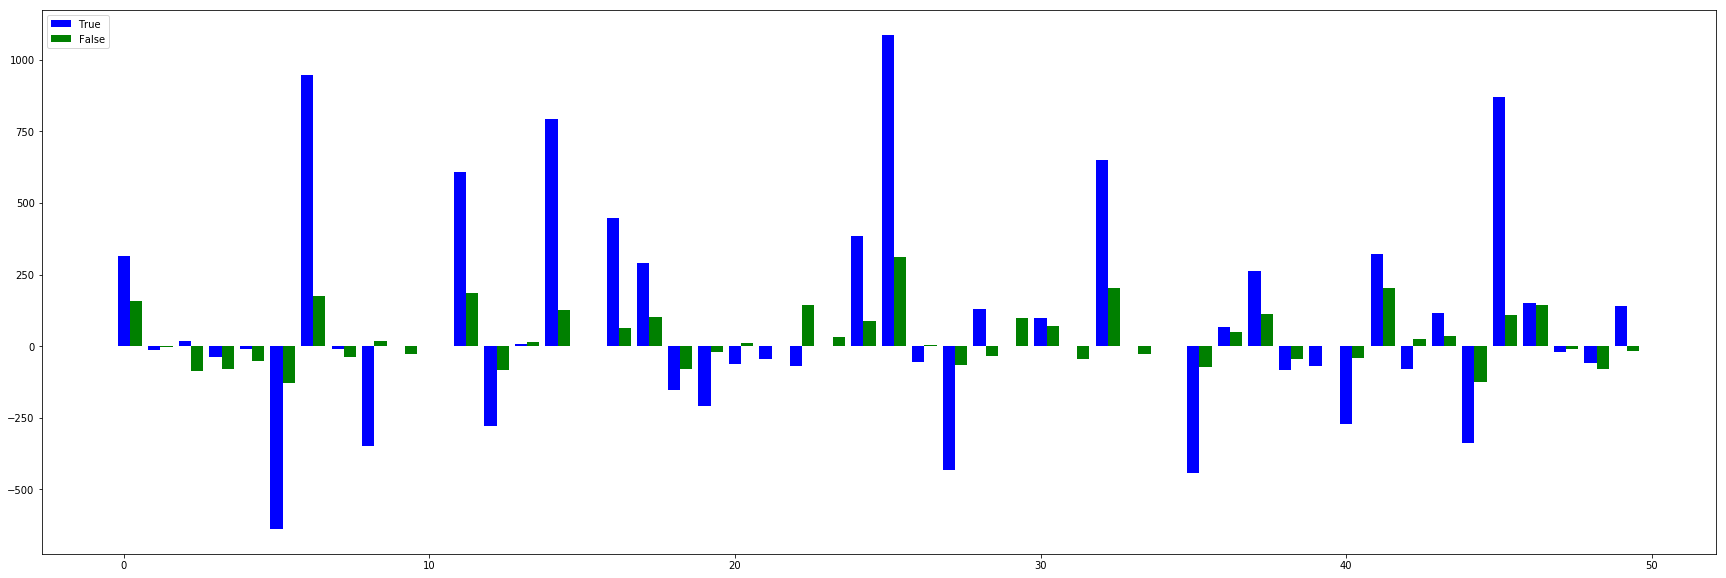

True TOP10
25 1087.1751282134387
6 947.1624894503068
45 870.8644684399727
14 793.5181578471459
32 650.6846214012485
5 639.1712045882598
11 607.4907195856892
16 447.76456743656155
35 443.6226212338272
27 431.1427794481349
False TOP10
25 311.0590993973527
41 202.48481040890618
32 201.4545767879052
11 184.0240435198786
6 174.15564277665953
0 159.34145864041685
22 144.47011794711582
46 143.60170068023226
5 128.7837703356506
44 126.96146792235842


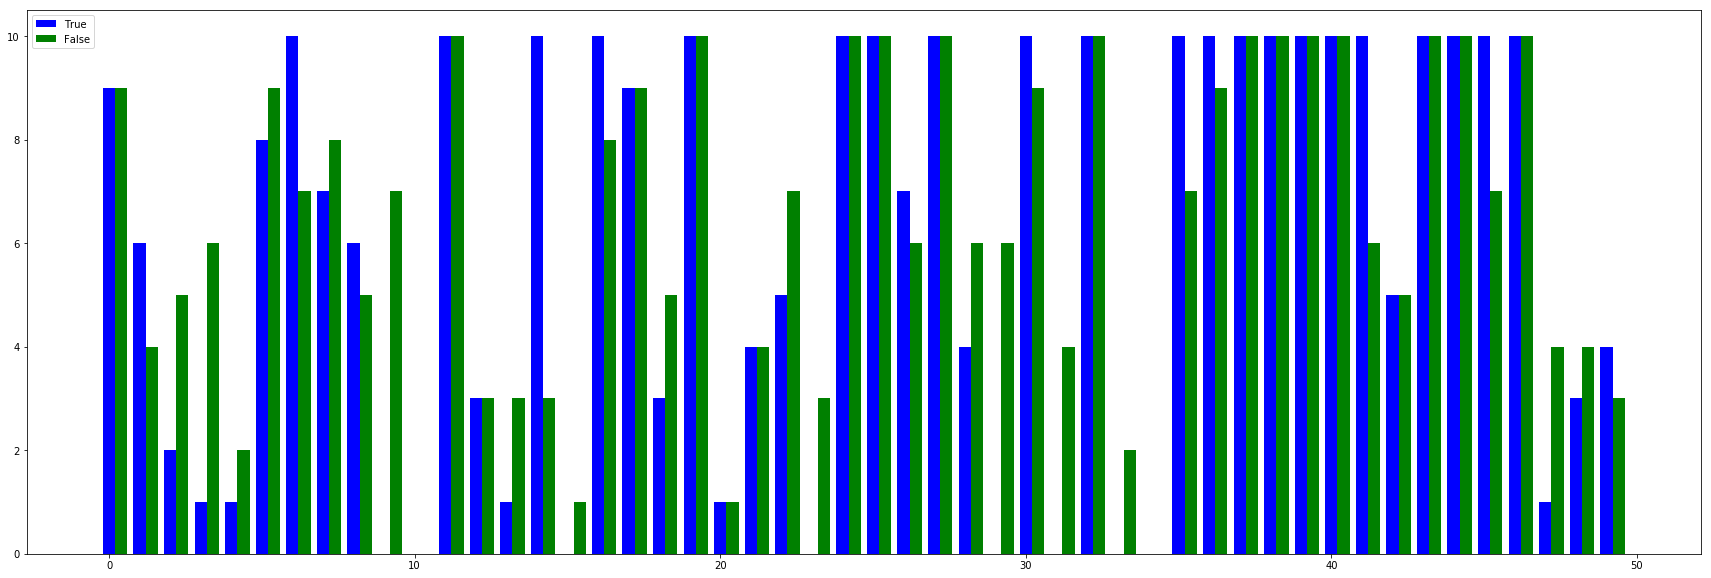

True TOP10
24 10.0
27 10.0
19 10.0
30 10.0
32 10.0
16 10.0
14 10.0
35 10.0
36 10.0
37 10.0
False TOP10
24 10.0
32 10.0
46 10.0
11 10.0
44 10.0
43 10.0
19 10.0
40 10.0
39 10.0
38 10.0


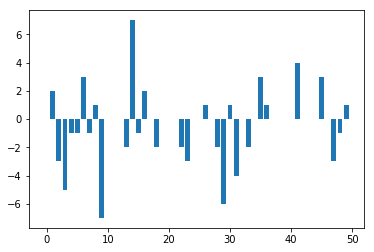

True - False TOP10


AxisError: axis -1 is out of bounds for array of dimension 0

In [22]:
for i in range(10):
    print(i)
    true_nums = true_list[i][:10]
#     print(len(true_nums))
    false_nums = false_list[i][:10]
#     print(len(false_nums))
    
    compare_g(true_nums, false_nums, i)
    compare_c(true_nums, false_nums, i)
    
    print("#############################")

In [23]:
def all_g_x(nums, label):
    li = np.zeros(784)
    for i in nums:
        g = network.gradient(x_test[i].reshape(1, 784), np.array([label]))
        li += np.sum(g['W1'], axis=1)
        
    return li
    

In [24]:
def all_c_x(nums, label):
    li = np.zeros(784)
    for i in nums:
        g = network.gradient(x_test[i].reshape(1, 784), np.array([label]))
        li += (np.sum(g['W1'], axis=1) != 0)
        
    return li
    

In [25]:
def compare_g_x(t_nums, f_nums, label):
    t = all_g_x(t_nums, label)
    f = all_g_x(f_nums, label)
    
    
    fig = plt.figure(figsize=(20, 20))
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)
    ax1.set_title("True sum of grads")
    ax1.imshow(t.reshape(28,28))
    ax2.set_title("False sum of grads")
    ax2.imshow(f.reshape(28,28))
    ax3.set_title("True- False sum of grads")
    ax3.imshow((t-f).reshape(28,28))
    
    plt.show()
    
    t_img = np.zeros(784)
    f_img = np.zeros(784)
    
    t_idx = []
    f_idx = []
    
    for i in range(100):
        t_idx.append(np.argsort(abs(t))[::-1][i])
        f_idx.append(np.argsort(abs(f))[::-1][i])
    
    for t_i, f_i in zip(t_idx, f_idx):
        t_img[t_i] = t[t_i]
        f_img[f_i] = f[t_i]
        
    fig = plt.figure(figsize=(20, 20))
    ax4 = fig.add_subplot(1, 3, 1)
    ax5 = fig.add_subplot(1, 3, 2)
    ax6 = fig.add_subplot(1, 3, 3)
    ax4.set_title("True sum of grads")
    ax4.imshow(t_img.reshape(28,28))
    ax5.set_title("False sum of grads")
    ax5.imshow(f_img.reshape(28,28))
    ax6.set_title("True - False sum of grads")
    ax6.imshow((t_img - f_img).reshape(28,28))
    
    plt.show()
    
    return t_img, f_img*0.01
    

In [34]:
def compare_c_x(t_nums, f_nums, label):
    t = all_c_x(t_nums, label)
    f = all_c_x(f_nums, label)
    
    fig = plt.figure(figsize=(20, 20))
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)
    ax1.set_title("True counts of grads")
    ax1.imshow(t.reshape(28,28))
    ax2.set_title("False counts of grads")
    ax2.imshow(f.reshape(28,28))
    ax3.set_title("True- False counts of grads")
    ax3.imshow((t-f).reshape(28,28))
    
    plt.show()
    
    t_img = np.zeros(784)
    f_img = np.zeros(784)
    
    t_idx = []
    f_idx = []
    
    for i in range(50):
        t_idx.append(np.argsort(t)[::-1][i])
        f_idx.append(np.argsort(f)[::-1][i])
    
    for t_i, f_i in zip(t_idx, f_idx):
        t_img[t_i] = t[t_i]
        f_img[f_i] = f[t_i]
        
    
    fig = plt.figure(figsize=(20, 20))
    ax4 = fig.add_subplot(1, 3, 1)
    ax5 = fig.add_subplot(1, 3, 2)
    ax6 = fig.add_subplot(1, 3, 3)
    ax4.set_title("True counts of grads")
    ax4.imshow(t_img.reshape(28,28))
    ax5.set_title("False counts of grads")
    ax5.imshow(f_img.reshape(28,28))
    ax6.set_title("True - False counts of grads")
    ax6.imshow((t_img - f_img).reshape(28,28))
    
    plt.show()
    
    return t_img, f_img
        
    
    

In [35]:
def check_miss(idxs, adv, label):
    nums = np.array(list(map(lambda x: x_test[x], idxs)))
    x_batch = nums - adv
    
    x_batch = x_batch.clip(min=0)
    
    fig = plt.figure(figsize=(15, 15))
    
    miss = 0
    
    for i, x in enumerate(x_batch):
        ax = fig.add_subplot(5, 5, i+1)
        ax.imshow(x.reshape(28,28), 'gray')
        pre = network.predict(x)
        pre_label = np.argmax(pre)
        pre_score = max(pre)
        ax.set_title(pre_label)
        
        if not pre_label == label:
            miss += 1

    plt.show()
    
    return miss/len(nums)

0
入力値への勾配の合計


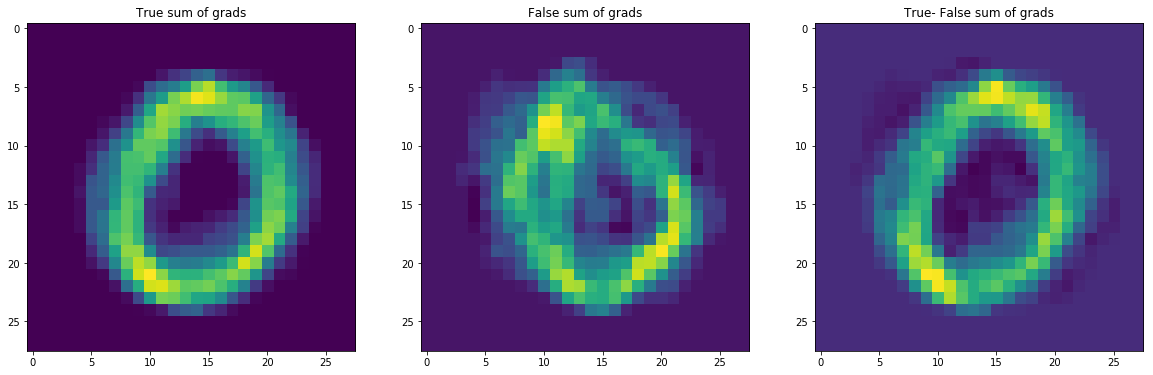

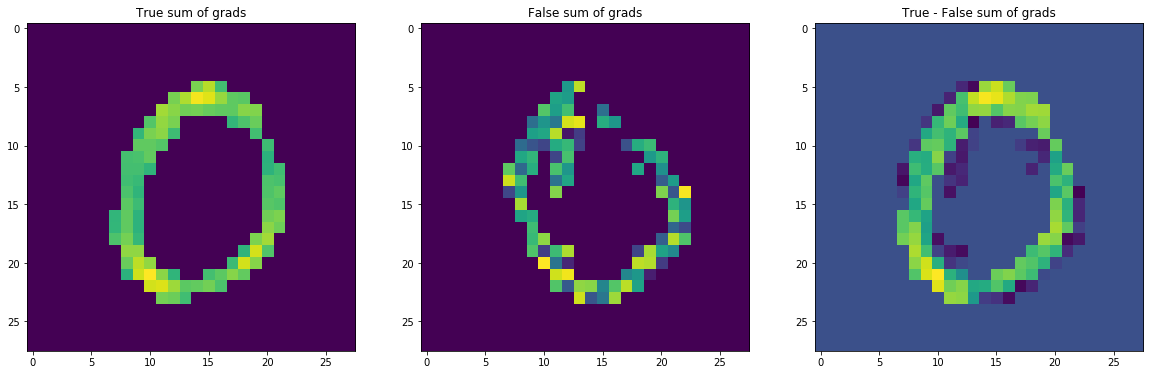

0
1.0
5
0.23086060705649272
0
1.0


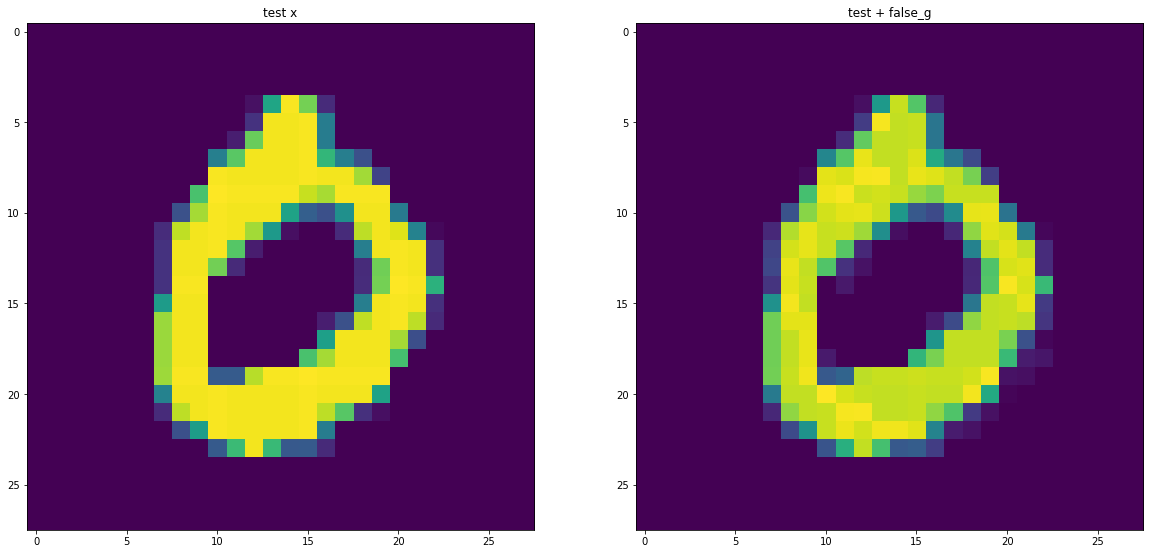

test x
0
0.999104281493455
test + false_g
0
0.9993421663513369
--------------------------
関わった入力値への回数


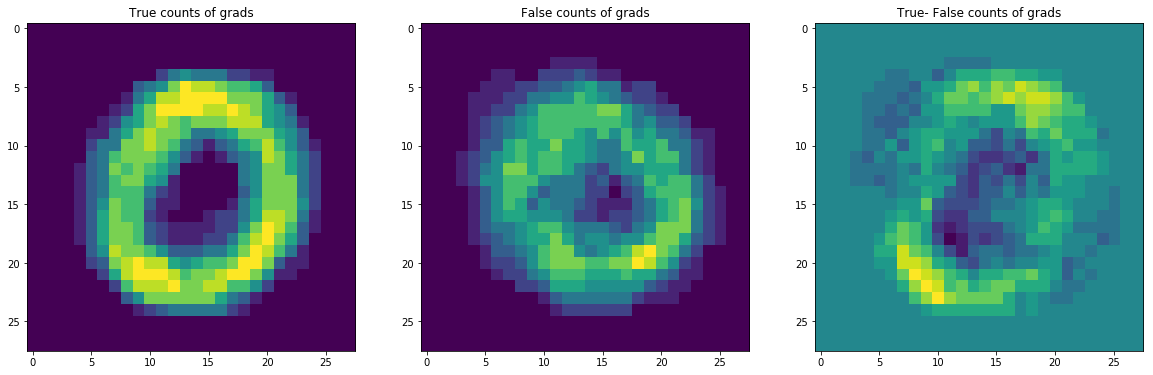

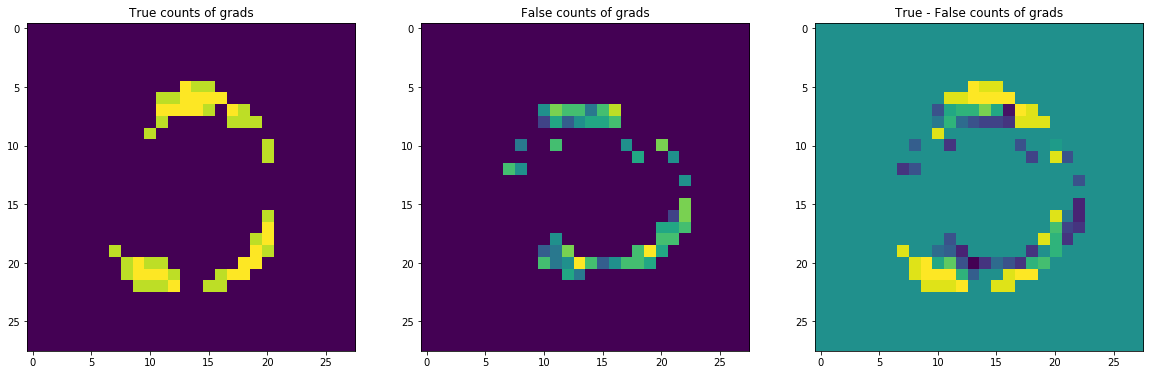

2
0.999874556599121
0
0.46936035222750294
2
0.9995751138072991


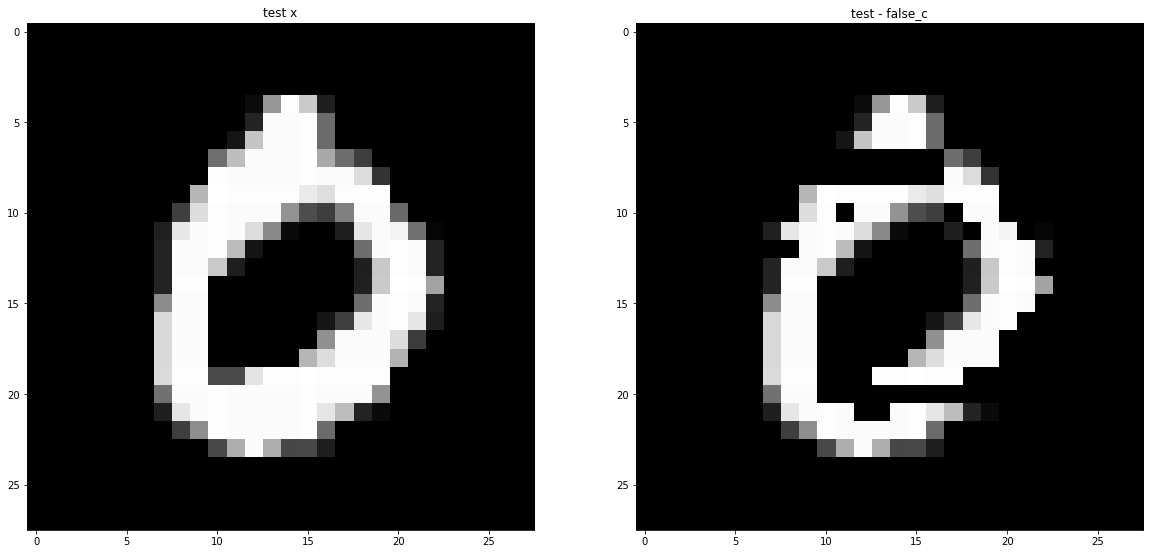

test x
0
0.999104281493455
test - false_c
0
0.9893600162572317
////////////
other nums


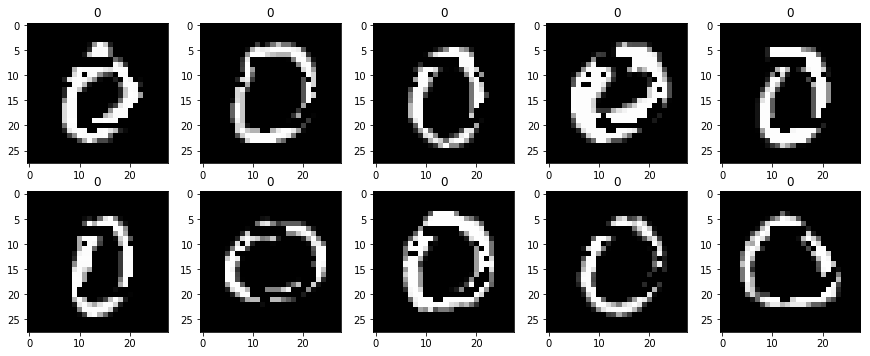

0.0
#############################
1
入力値への勾配の合計


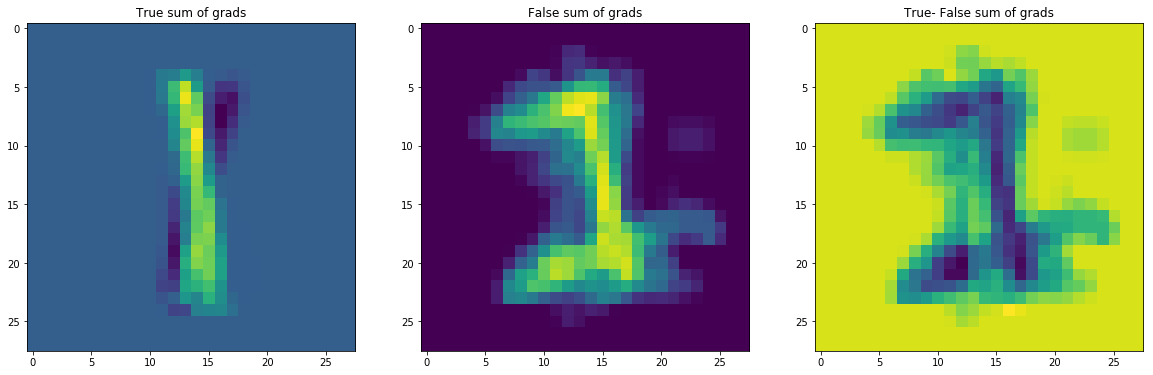

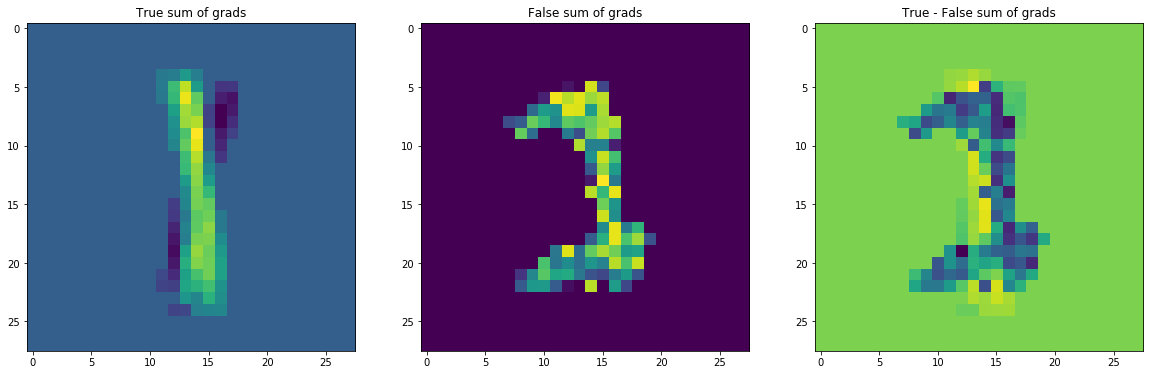

1
0.9999999959087491
7
0.21793427507713017
1
0.9999999946769236


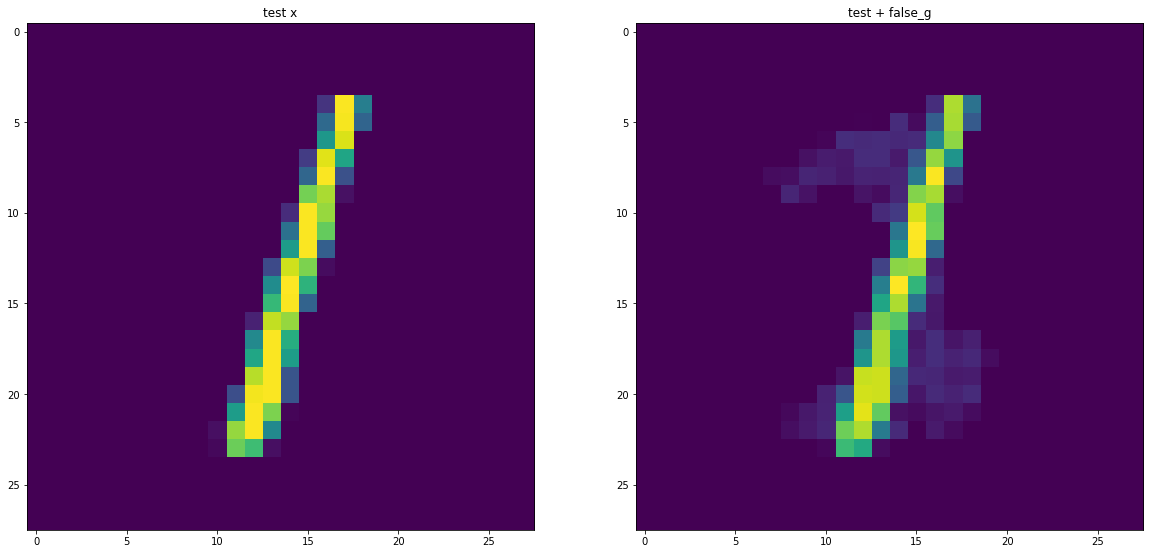

test x
1
0.9881528905151862
test + false_g
1
0.9883762737045318
--------------------------
関わった入力値への回数


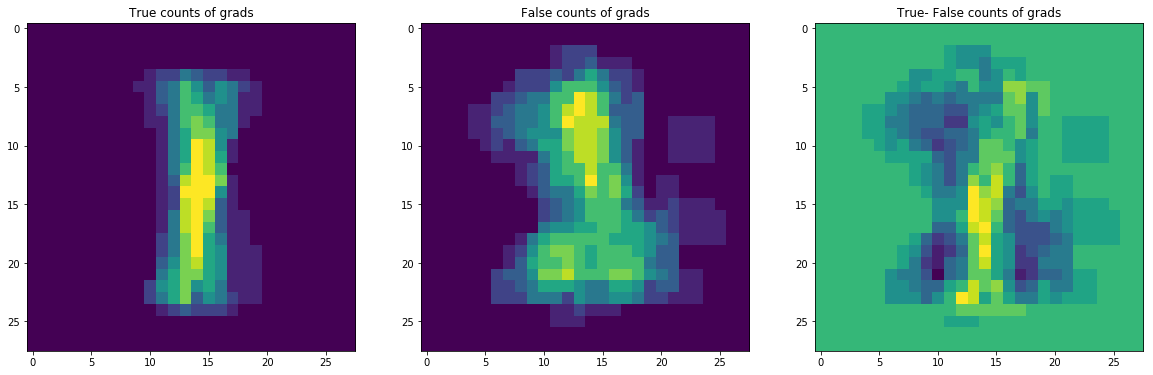

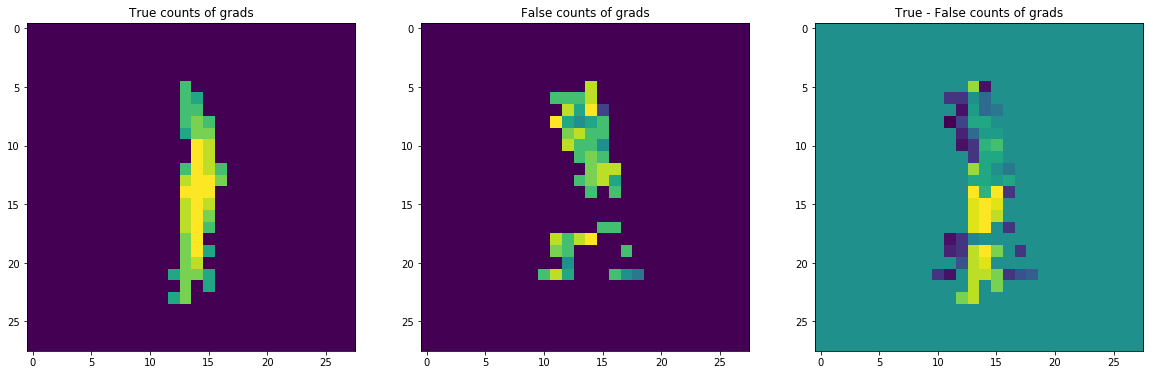

1
1.0
1
0.7821042252779302
1
1.0


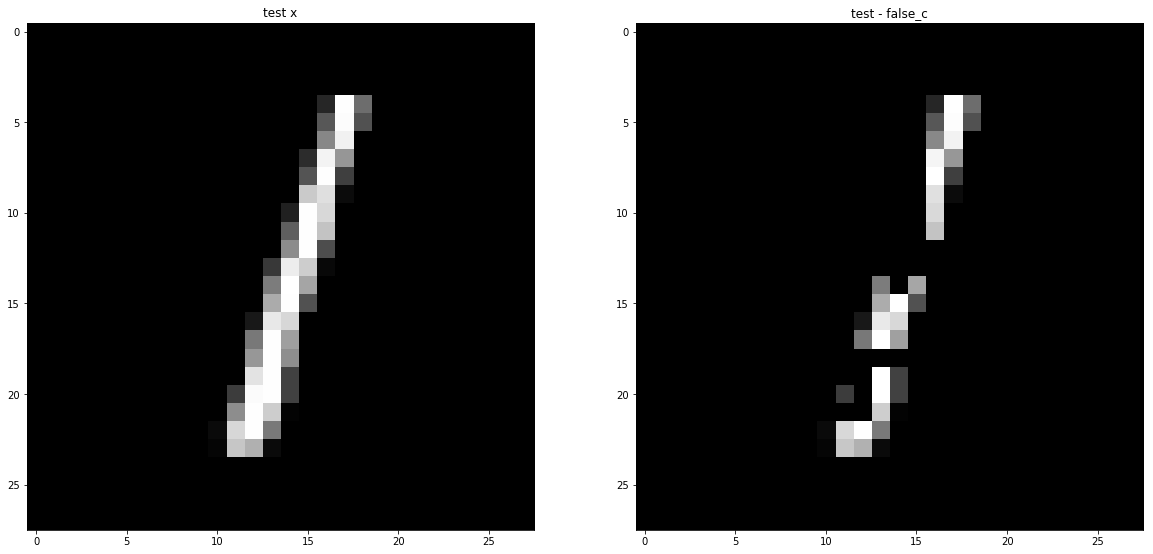

test x
1
0.9881528905151862
test - false_c
2
0.3611131846823933
////////////
other nums


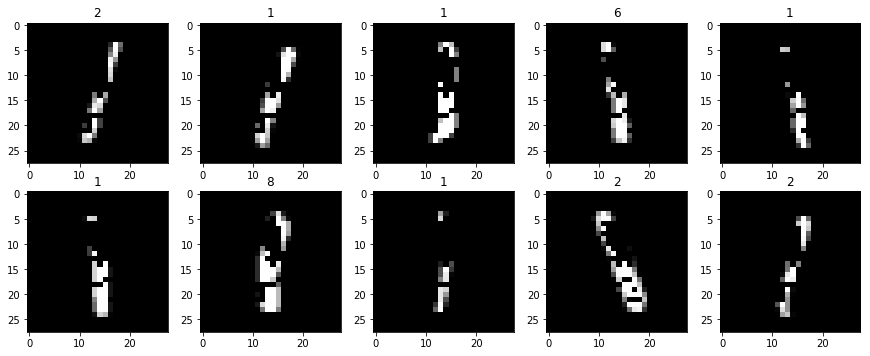

0.5
#############################
2
入力値への勾配の合計


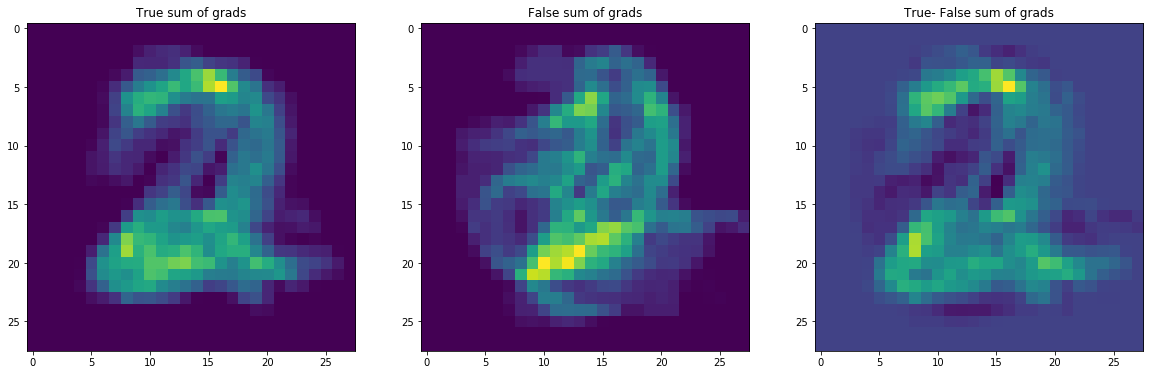

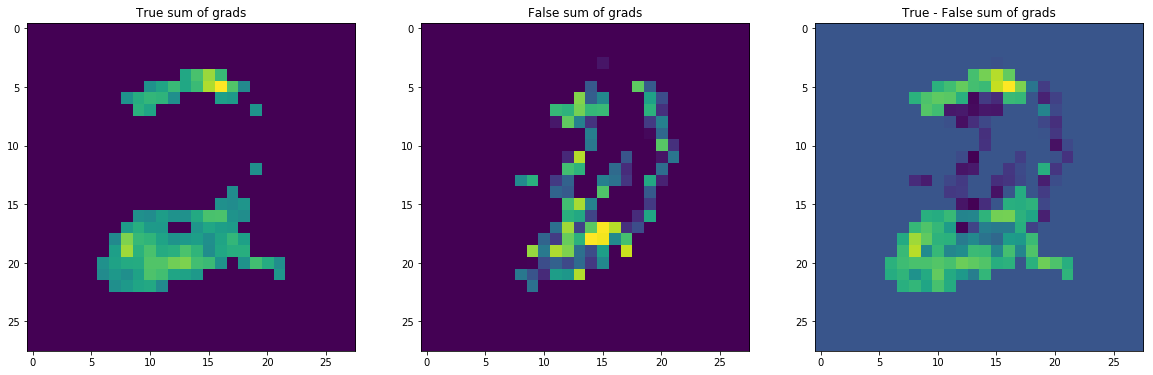

2
1.0
5
0.1944848959689708
2
1.0


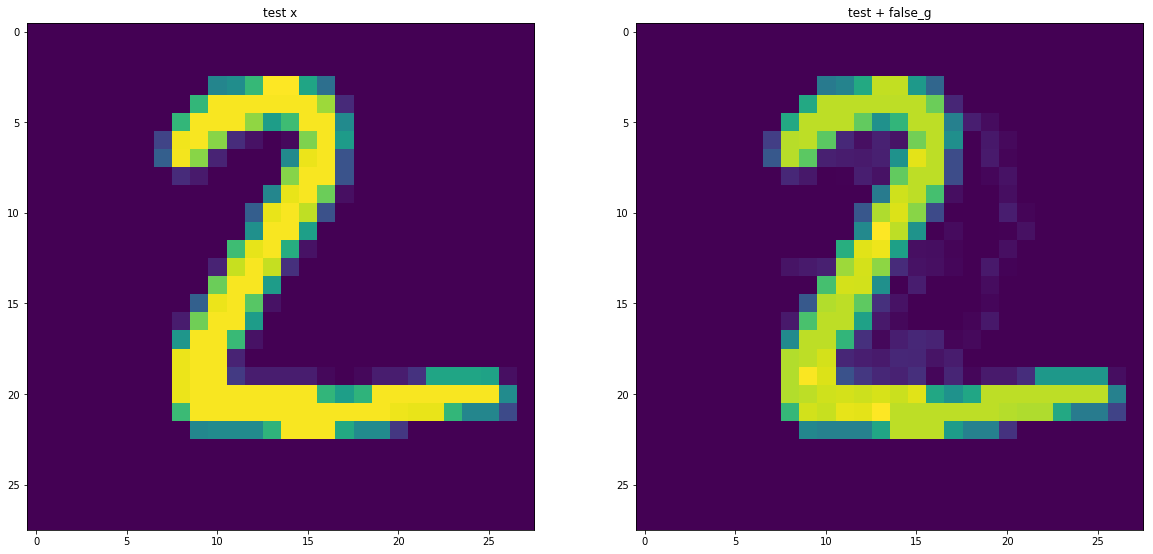

test x
2
0.9967669764932537
test + false_g
2
0.9971198424061237
--------------------------
関わった入力値への回数


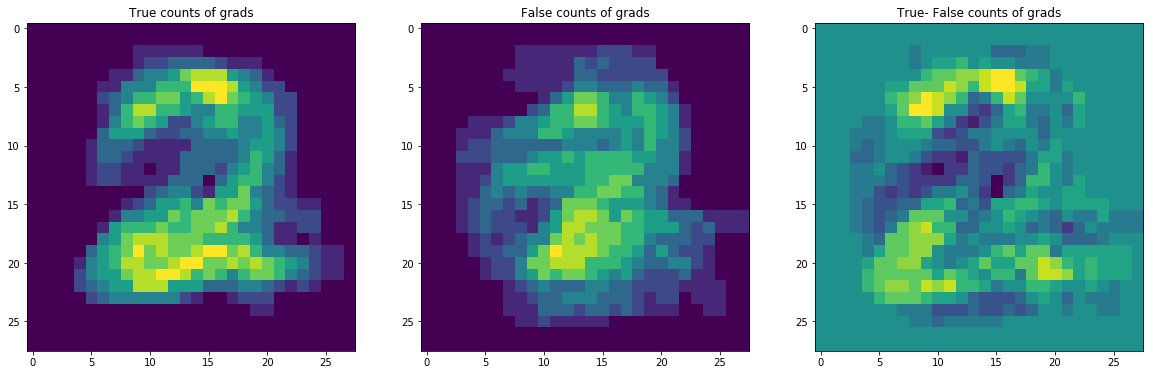

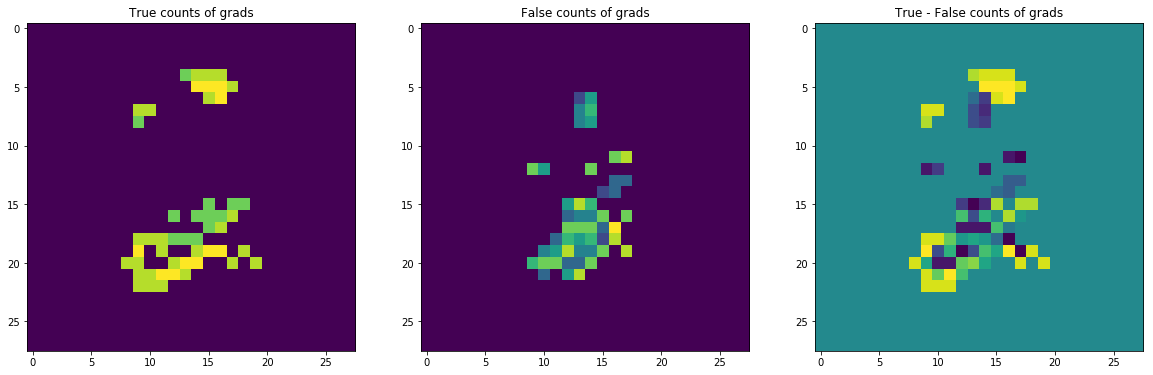

2
0.9999999999999982
6
0.6397987434831911
2
0.9999999999999987


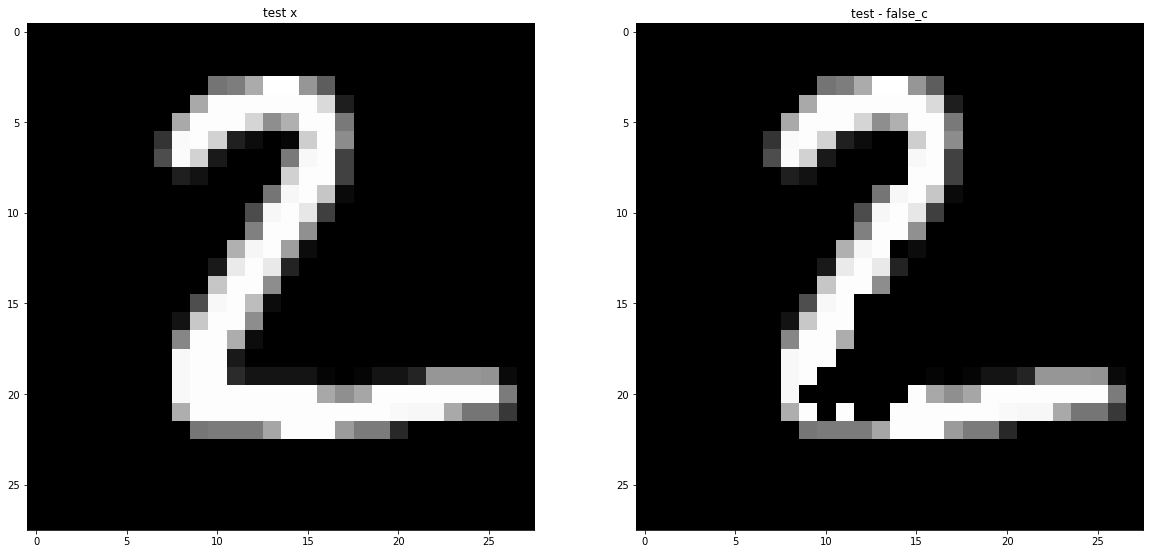

test x
2
0.9967669764932537
test - false_c
2
0.9327521296611875
////////////
other nums


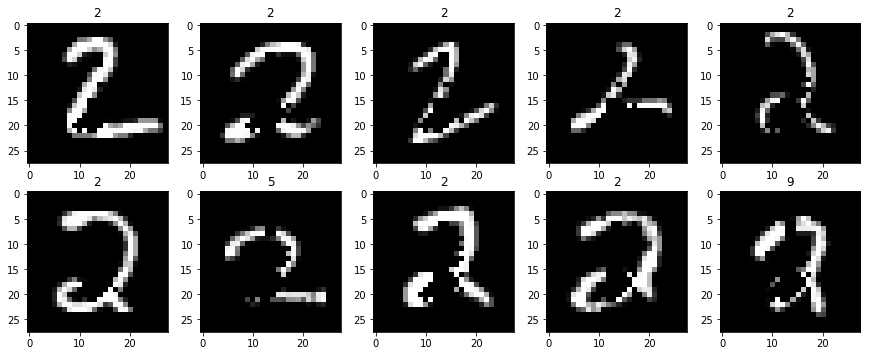

0.2
#############################
3
入力値への勾配の合計


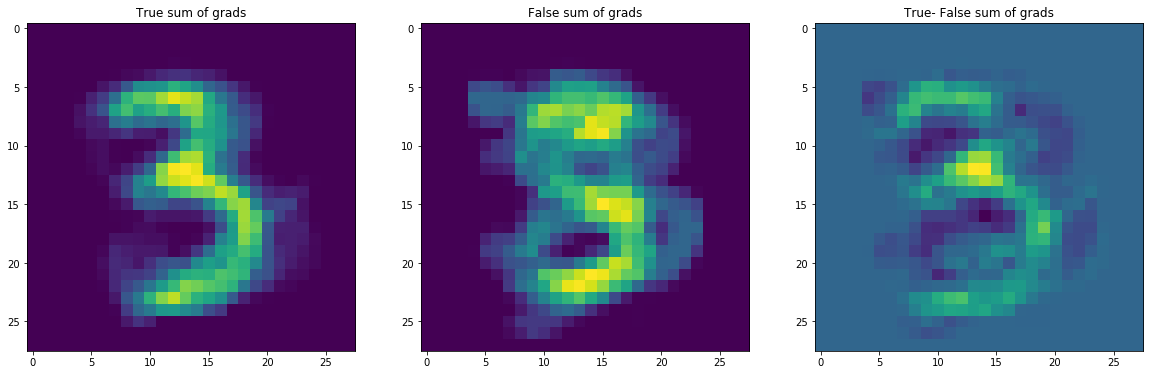

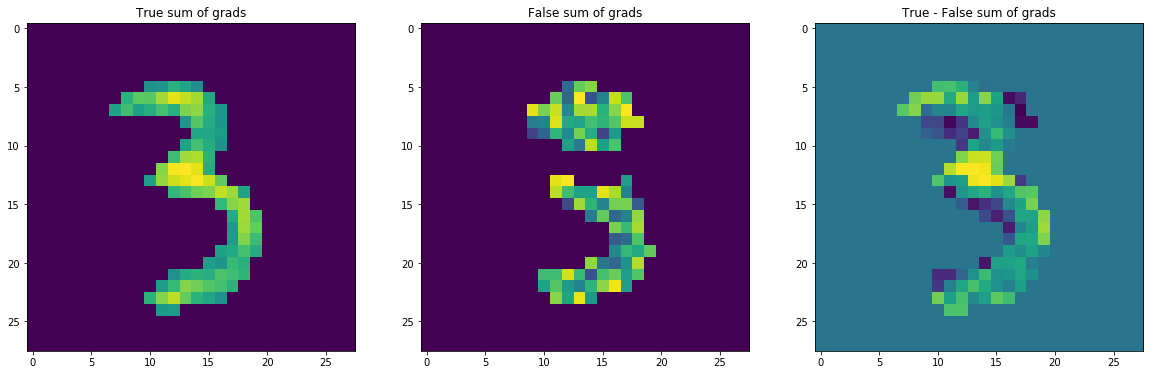

3
1.0
5
0.2519662057651732
3
1.0


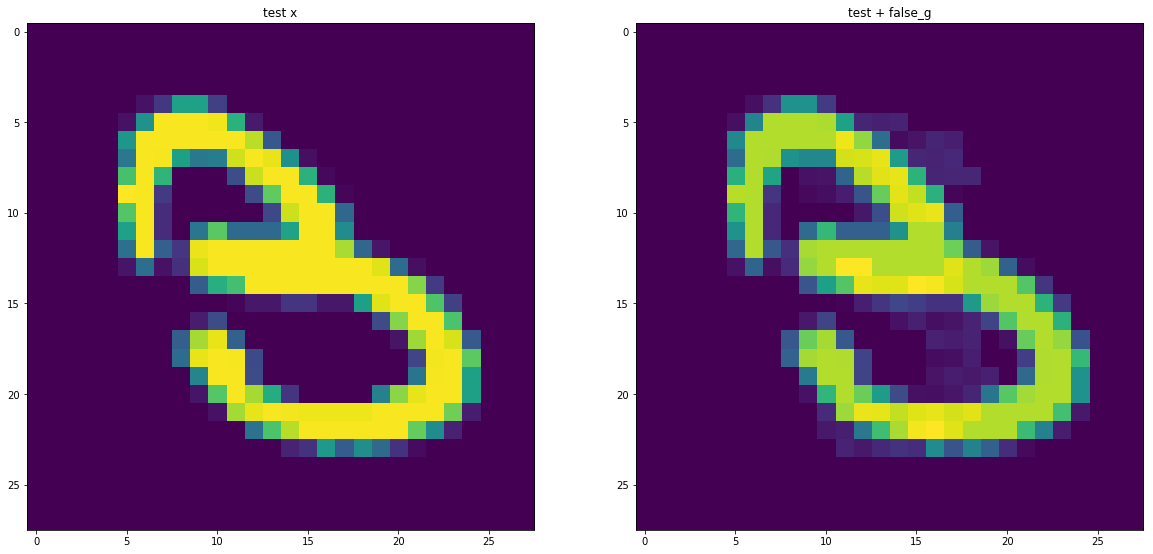

test x
3
0.9257243443578324
test + false_g
3
0.9384525388895703
--------------------------
関わった入力値への回数


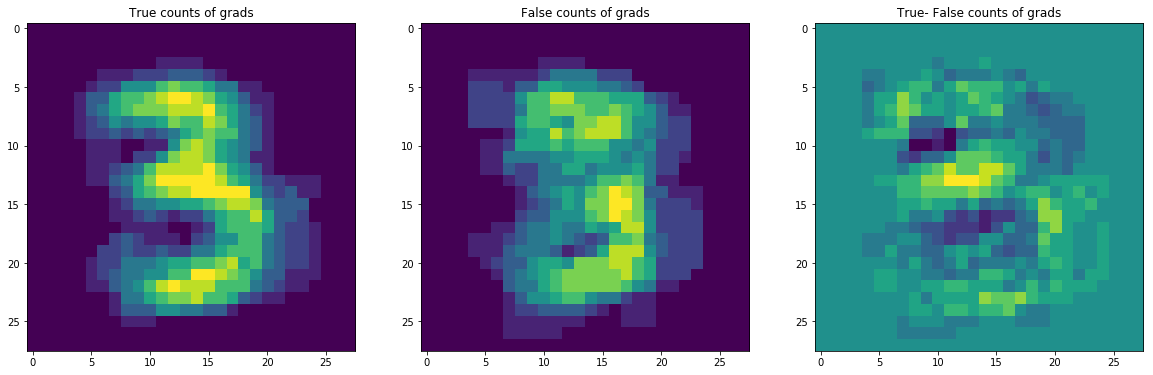

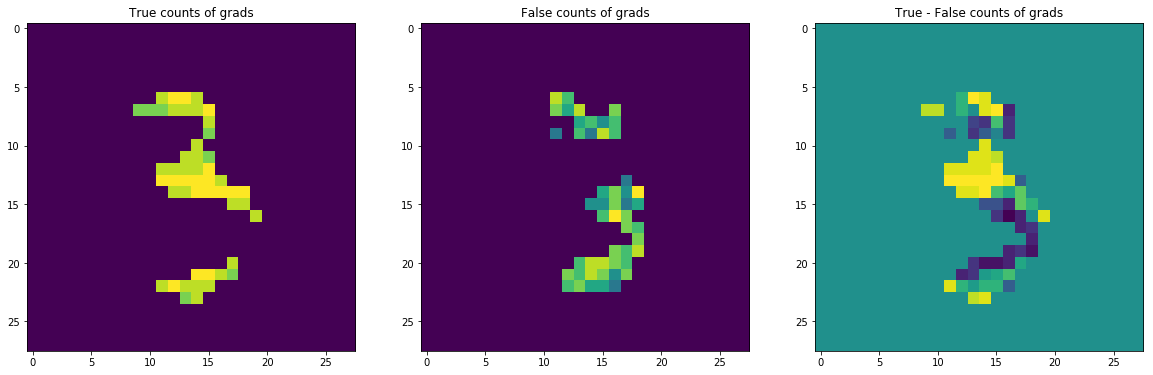

3
0.9999995362858435
7
0.6102937667182446
3
0.9999988499642126


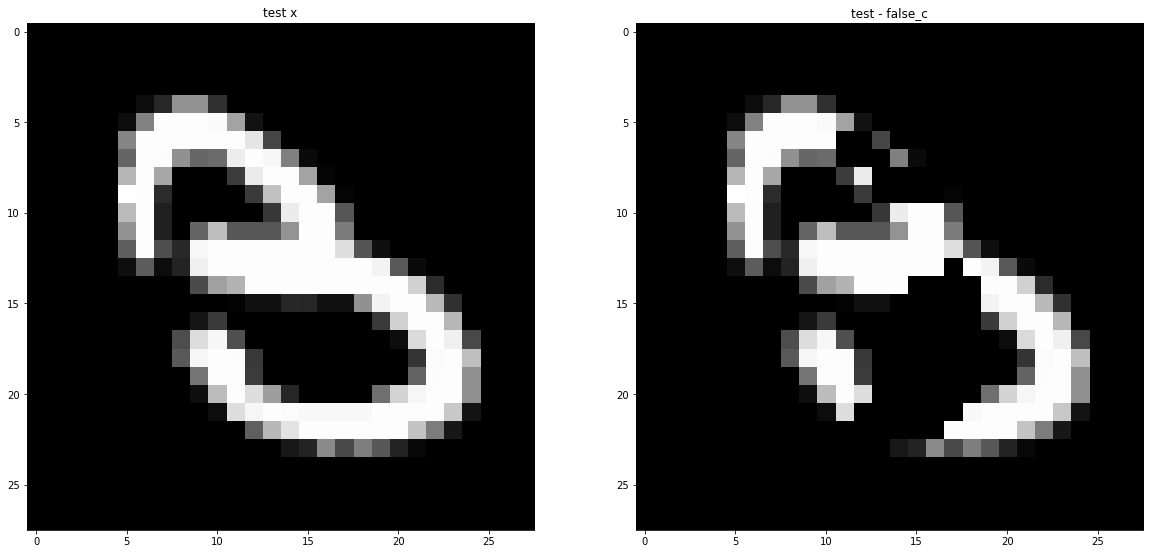

test x
3
0.9257243443578324
test - false_c
3
0.7566647767036244
////////////
other nums


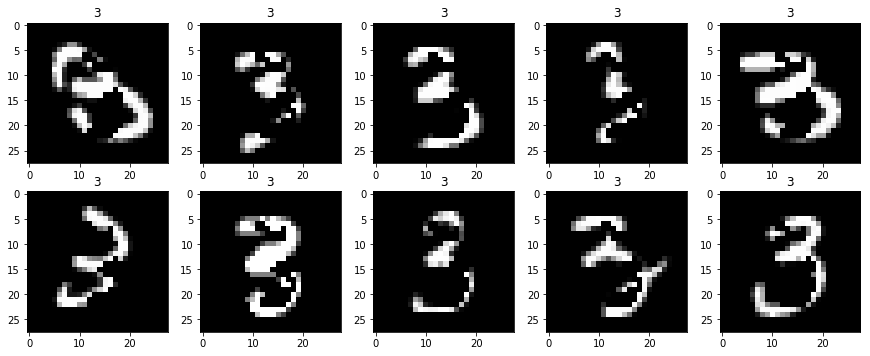

0.0
#############################
4
入力値への勾配の合計


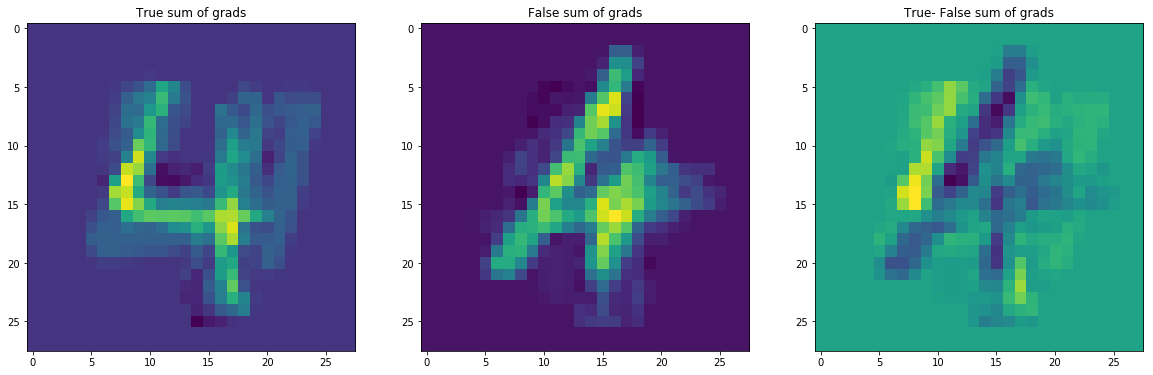

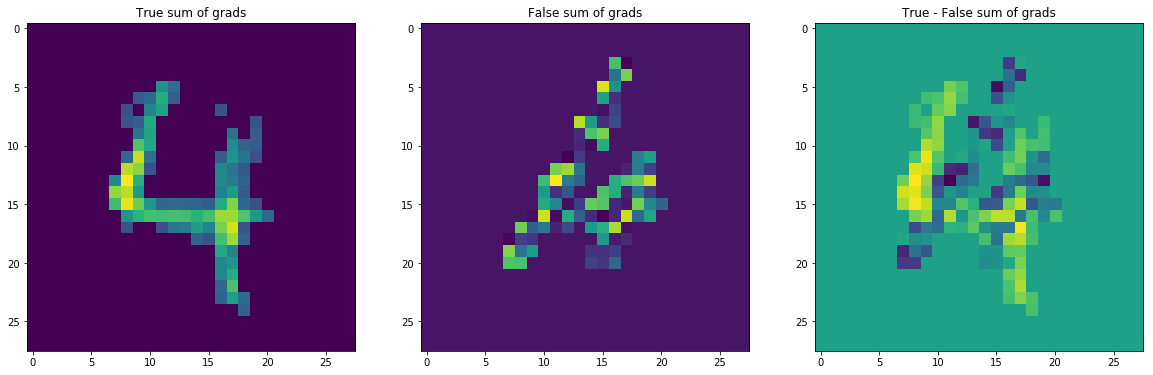

4
1.0
5
0.20607526031680196
4
1.0


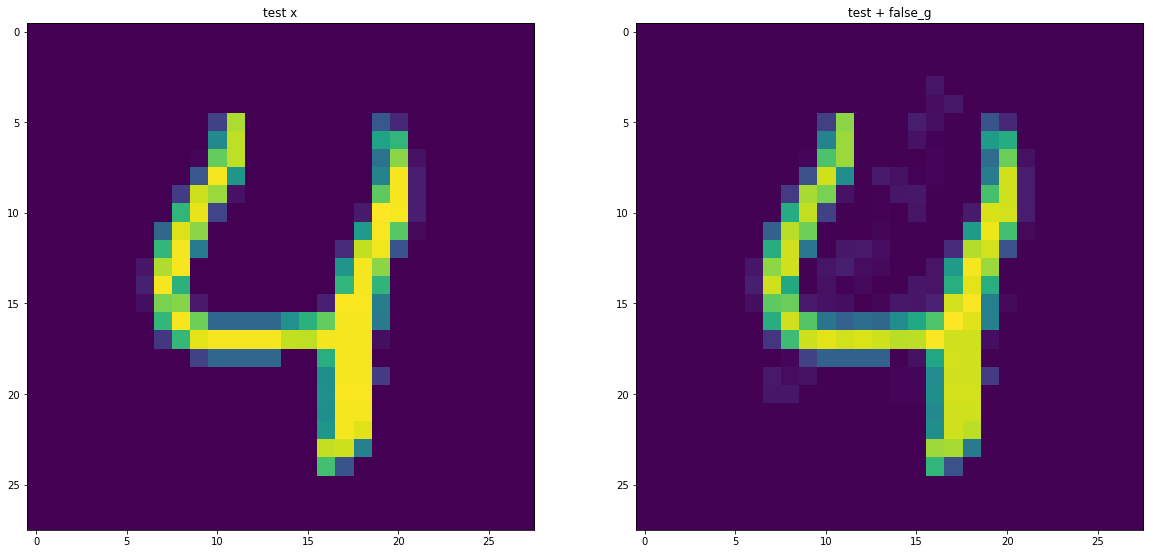

test x
4
0.9860730100759626
test + false_g
4
0.988455969153714
--------------------------
関わった入力値への回数


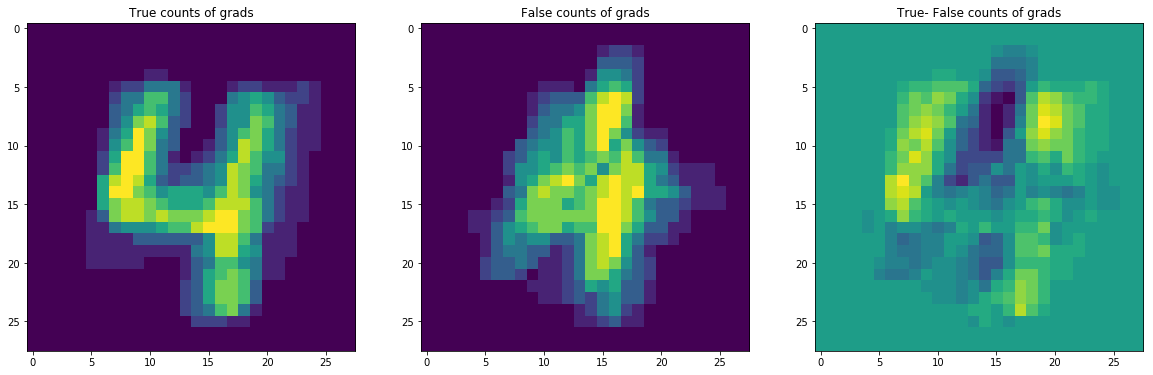

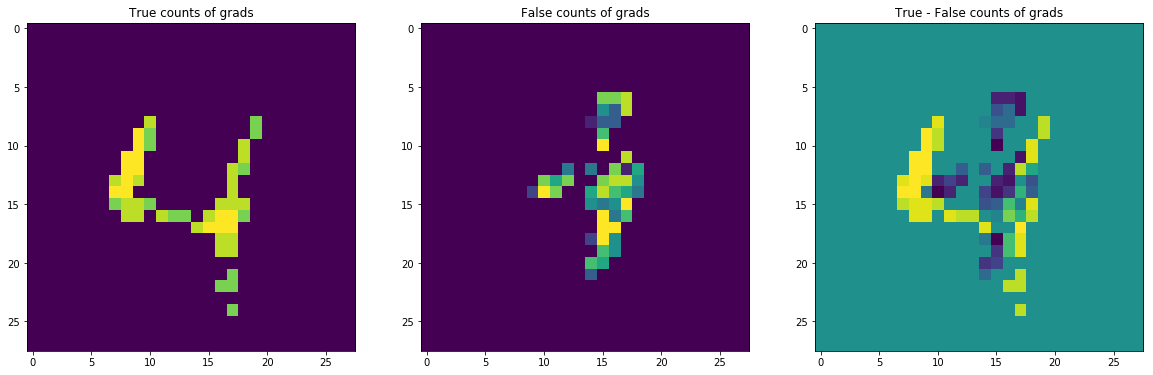

4
1.0
4
0.8004933981608943
4
1.0


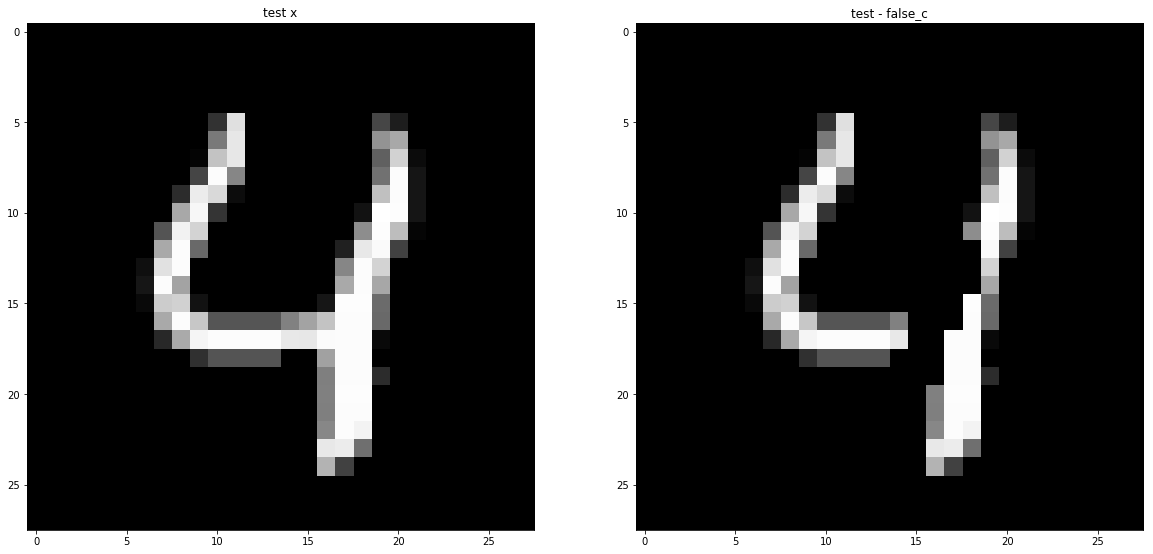

test x
4
0.9860730100759626
test - false_c
4
0.8084145394631372
////////////
other nums


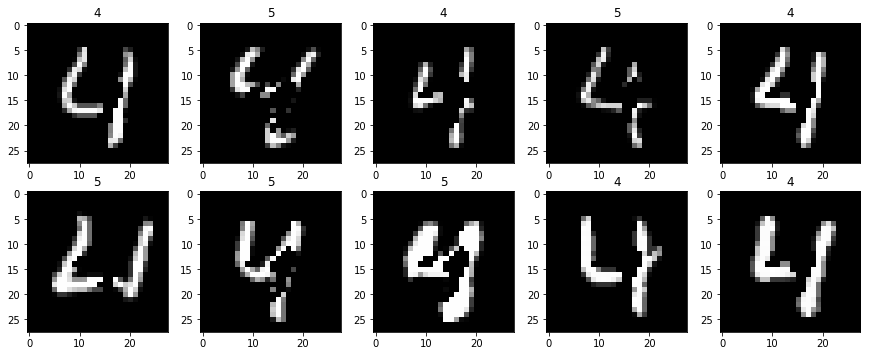

0.5
#############################
5
入力値への勾配の合計


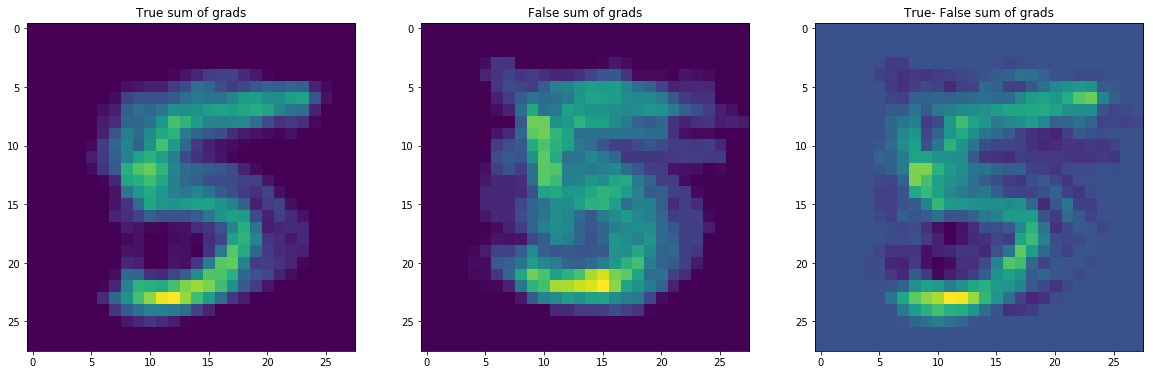

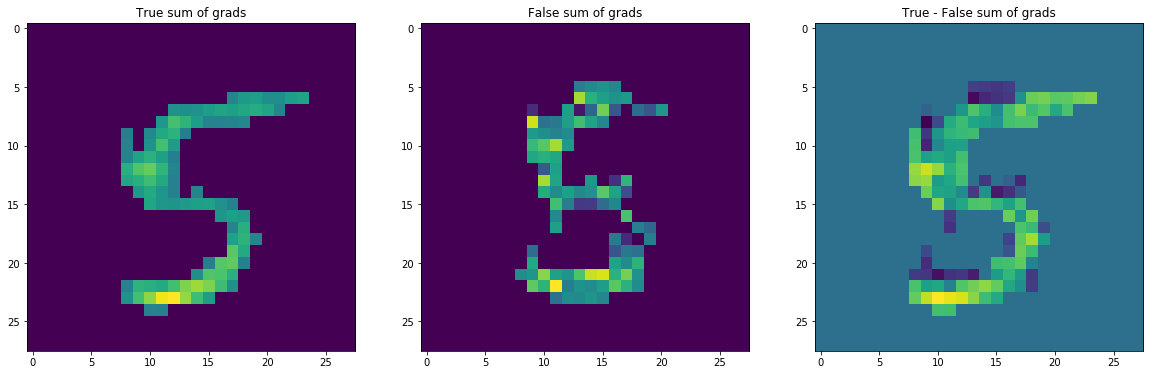

5
1.0
5
0.34078101860324755
5
1.0


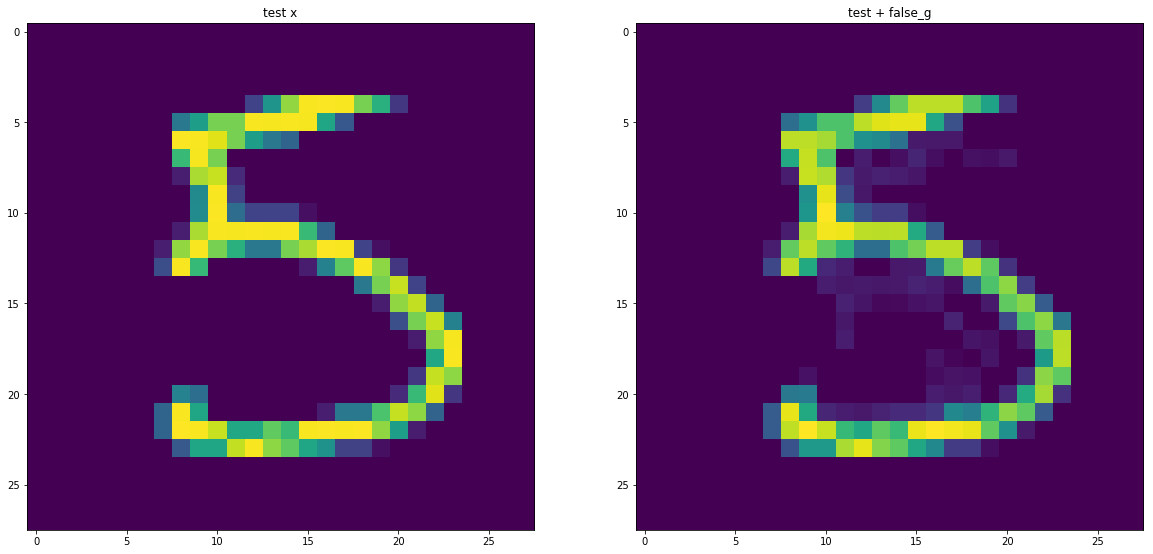

test x
5
0.9743055939520705
test + false_g
5
0.9870320992259382
--------------------------
関わった入力値への回数


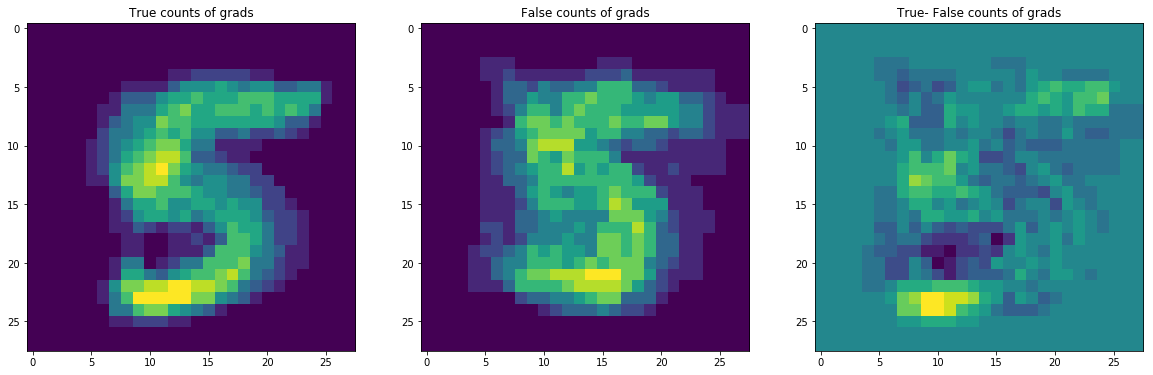

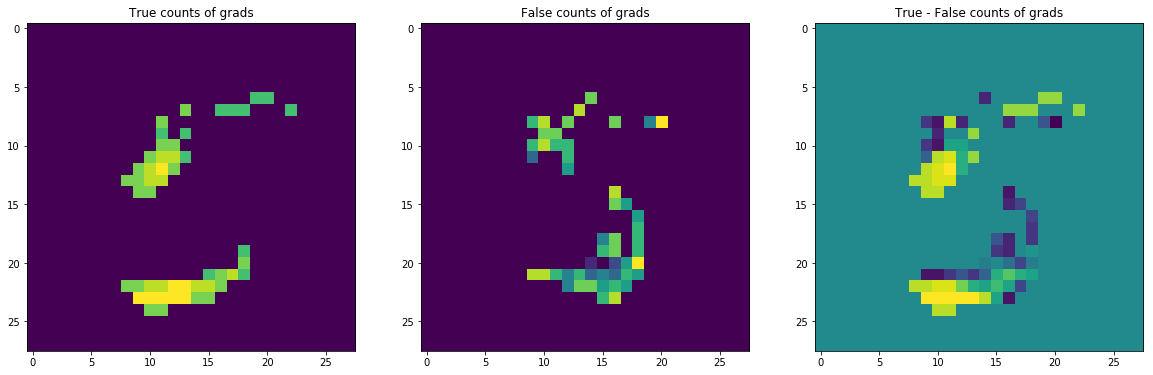

5
1.0
5
0.9140411169536563
5
1.0


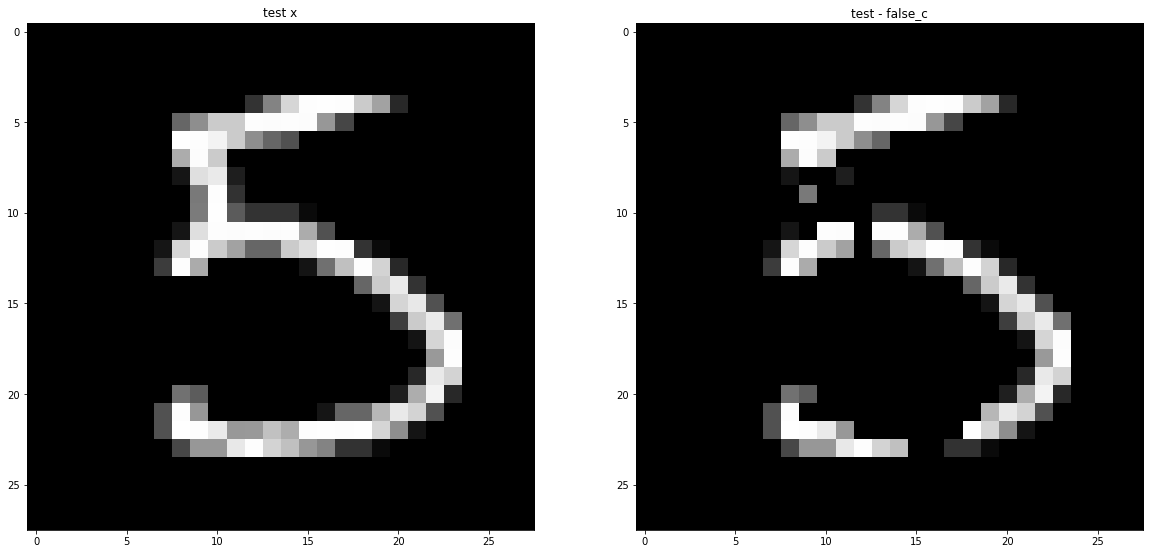

test x
5
0.9743055939520705
test - false_c
3
0.7884568845226108
////////////
other nums


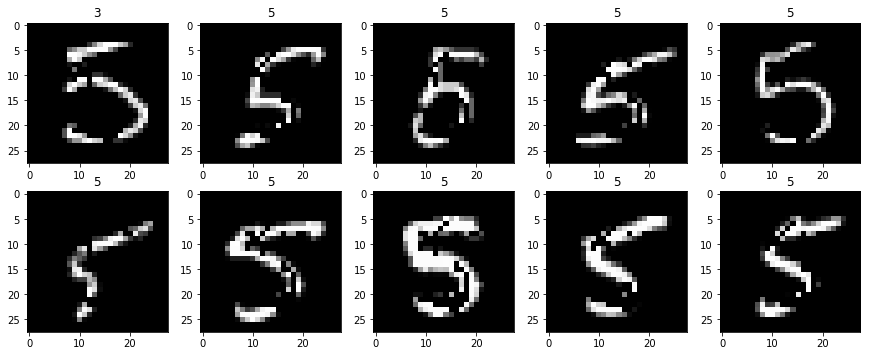

0.1
#############################
6
入力値への勾配の合計


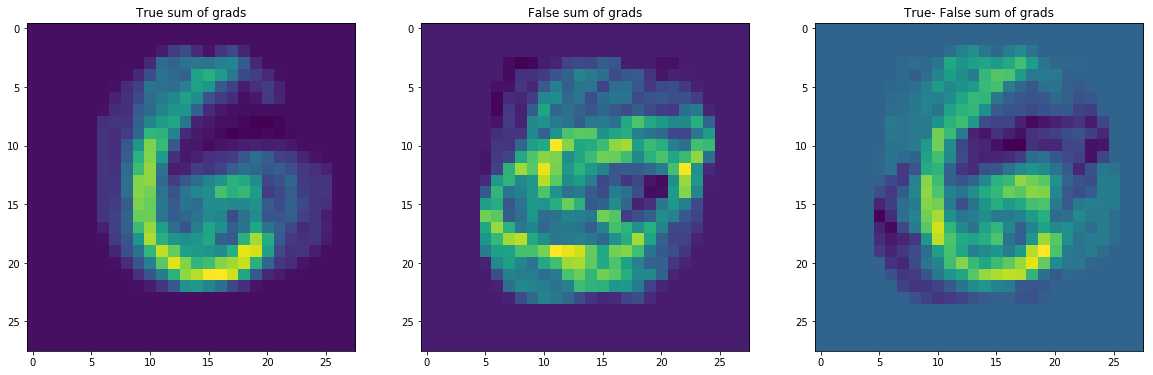

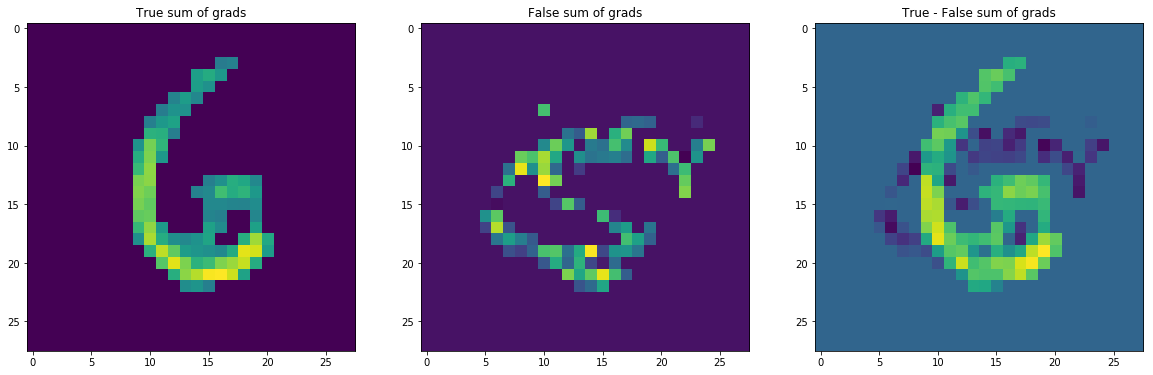

6
1.0
5
0.25276549369639306
6
1.0


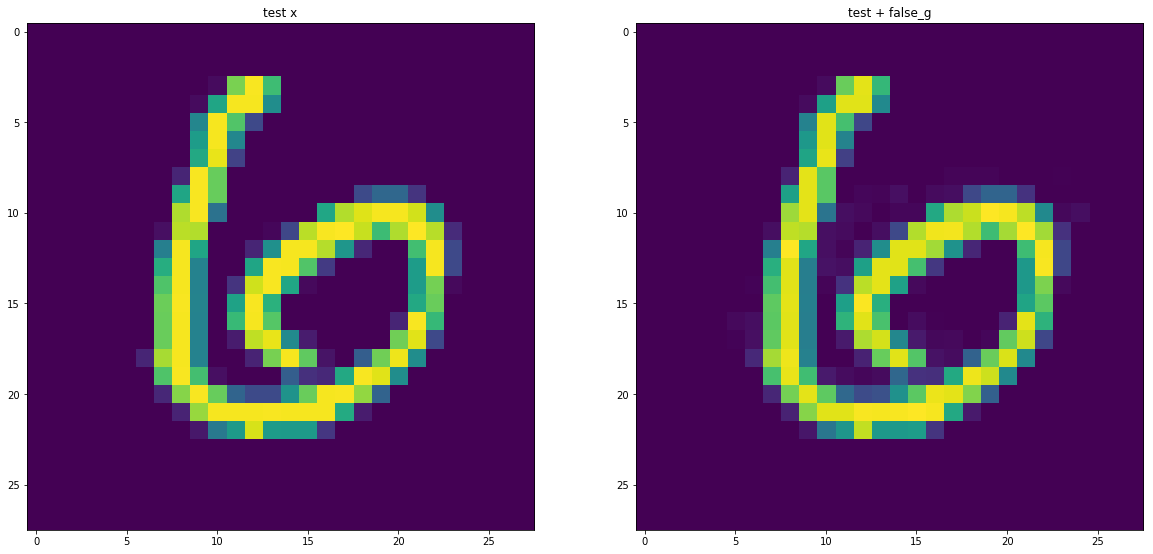

test x
6
0.9941775334874516
test + false_g
6
0.9950885728497018
--------------------------
関わった入力値への回数


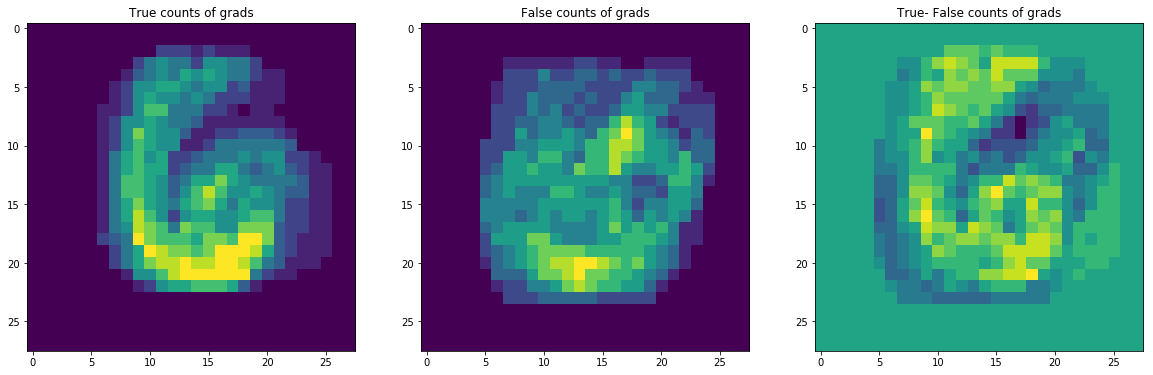

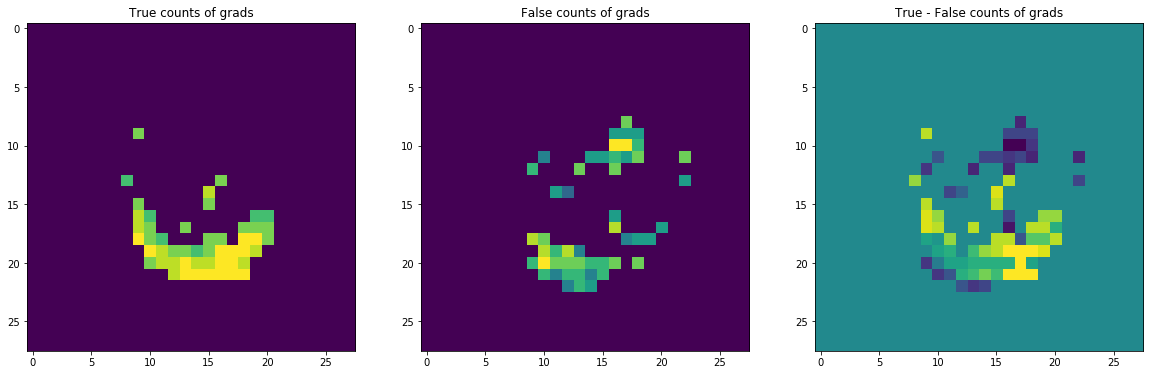

6
0.9999999999993132
0
0.49941176990500313
6
0.9999999999981402


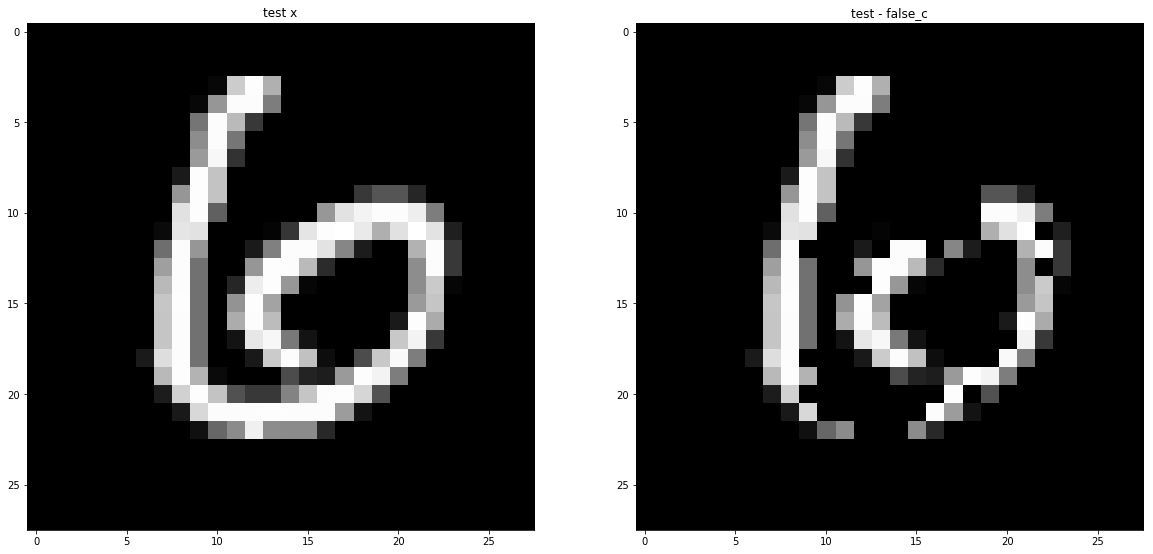

test x
6
0.9941775334874516
test - false_c
6
0.6397478484655527
////////////
other nums


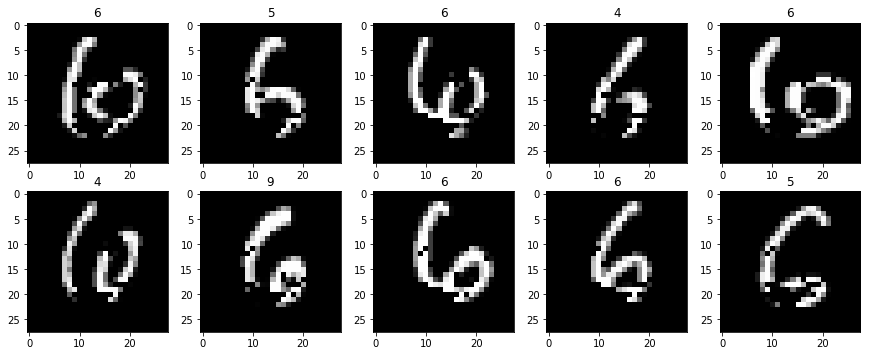

0.5
#############################
7
入力値への勾配の合計


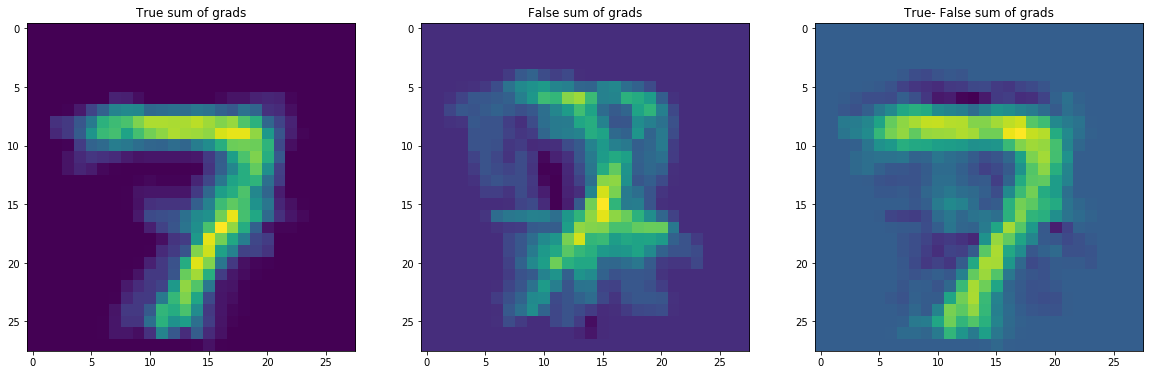

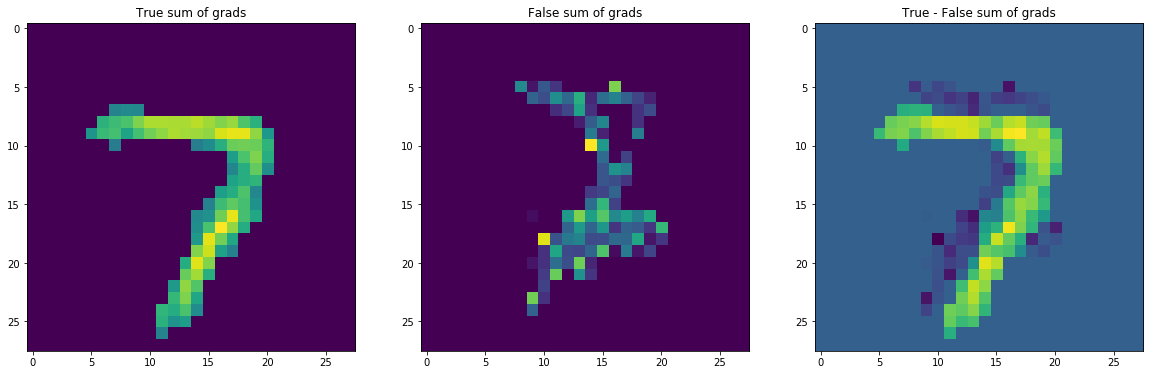

7
1.0
7
0.2178681538499541
7
1.0


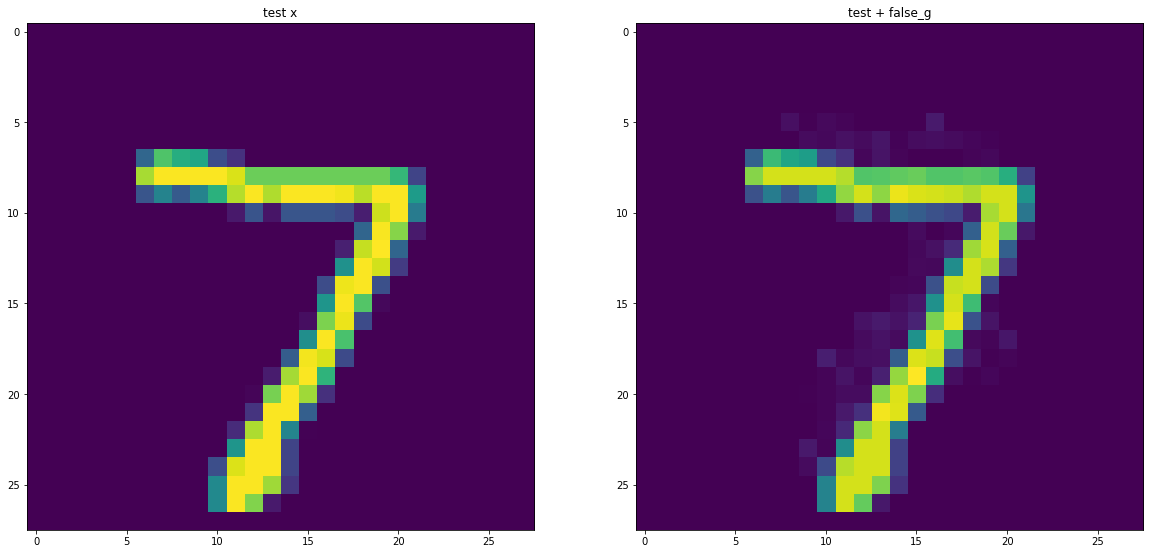

test x
7
0.9963132537478793
test + false_g
7
0.9957227123538845
--------------------------
関わった入力値への回数


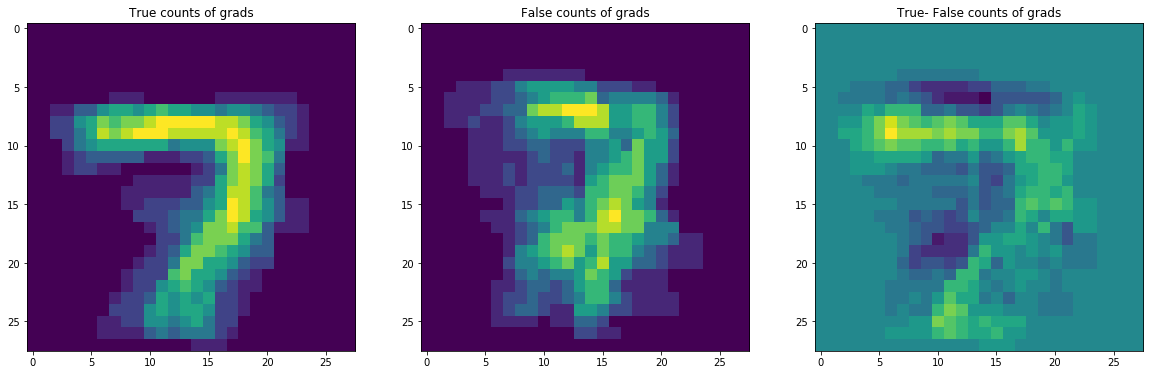

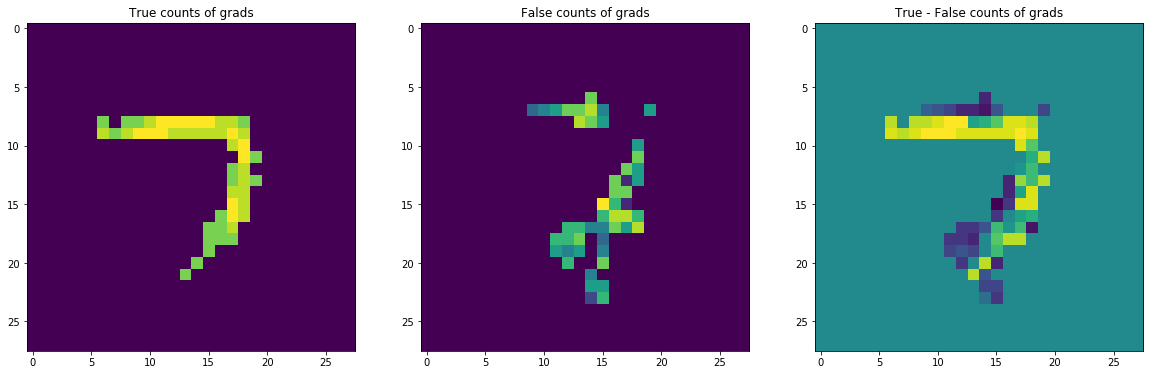

7
1.0
7
0.9423221478580646
7
1.0


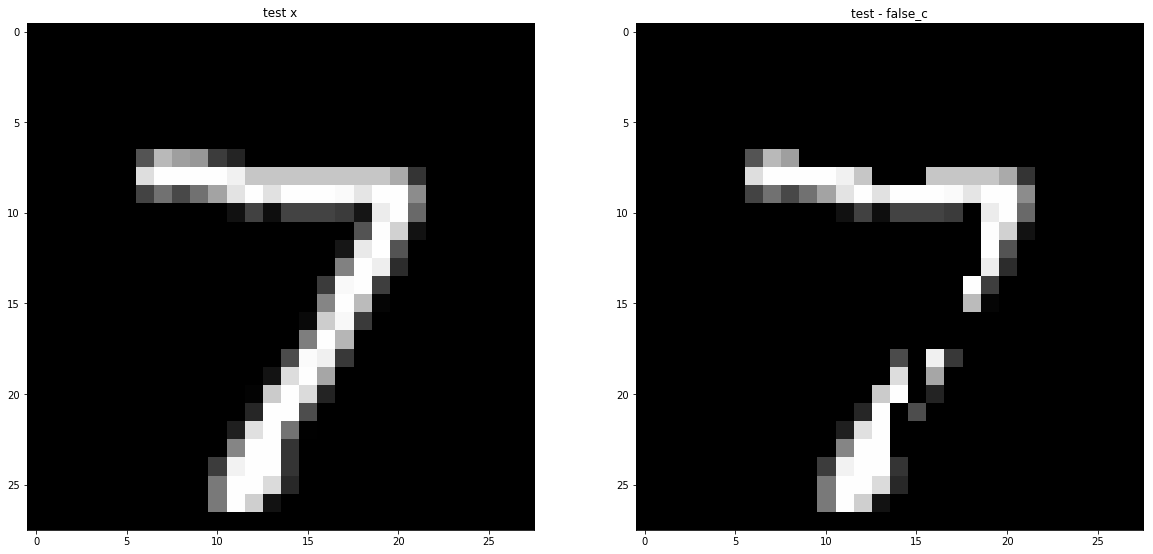

test x
7
0.9963132537478793
test - false_c
7
0.968859006879115
////////////
other nums


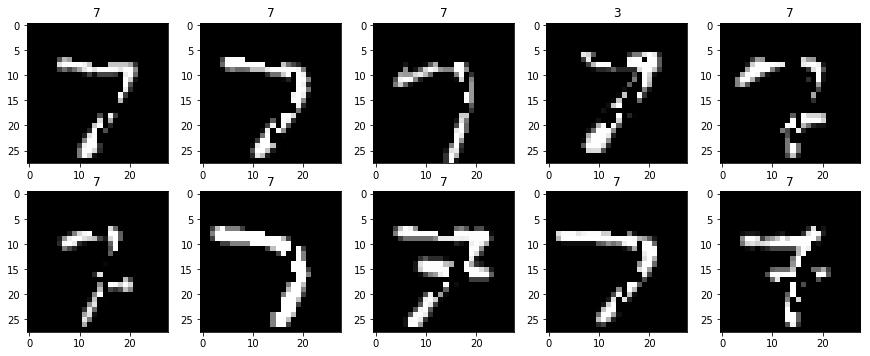

0.1
#############################
8
入力値への勾配の合計


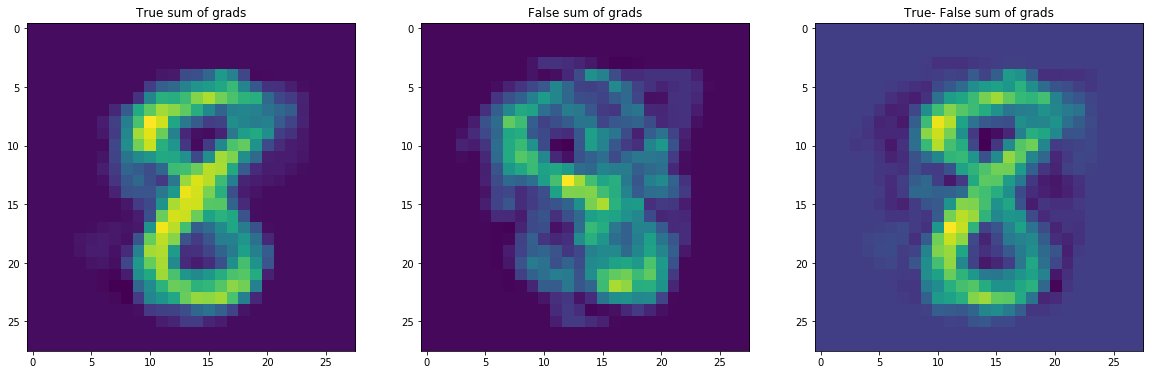

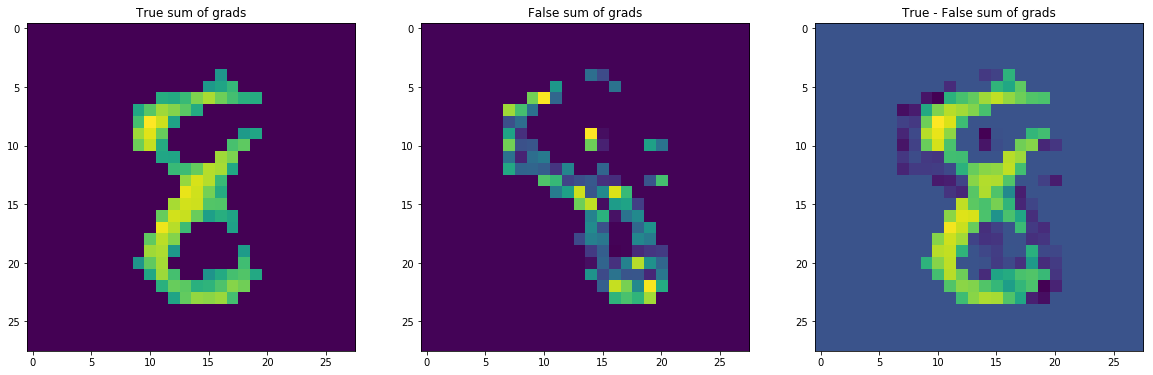

8
1.0
5
0.1904588330560351
8
1.0


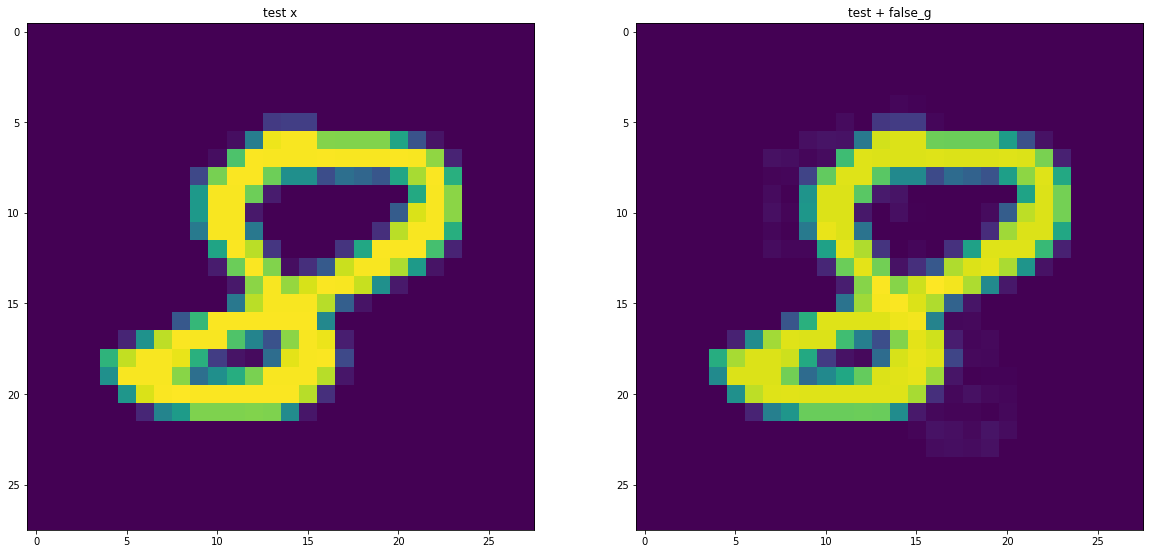

test x
8
0.9851680582636301
test + false_g
8
0.9868716502072715
--------------------------
関わった入力値への回数


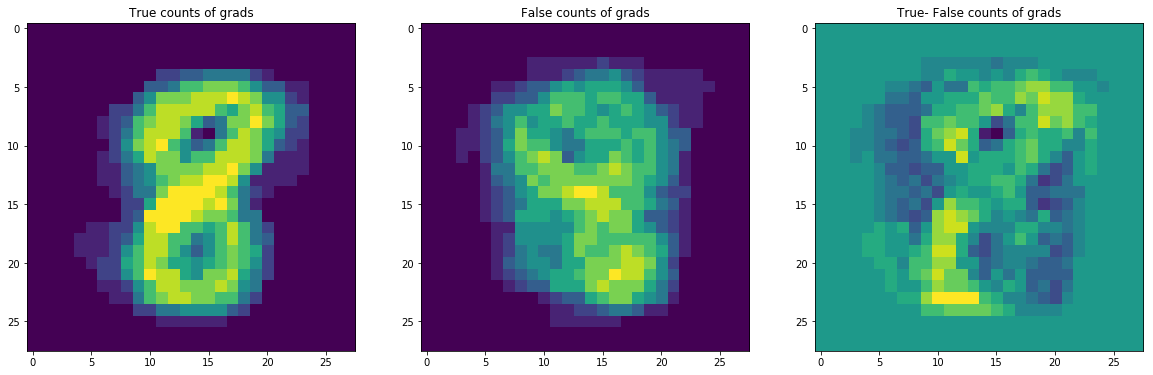

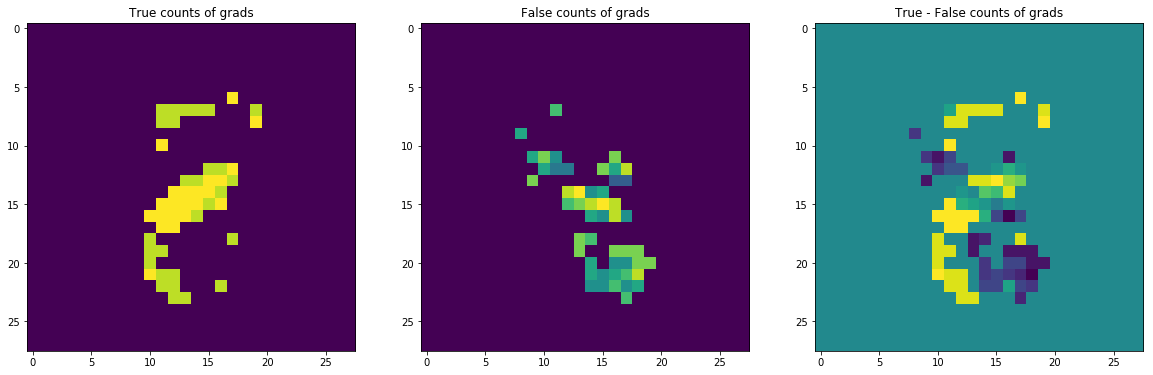

8
0.9999521444967779
4
0.4046160275903802
8
0.9965459409367591


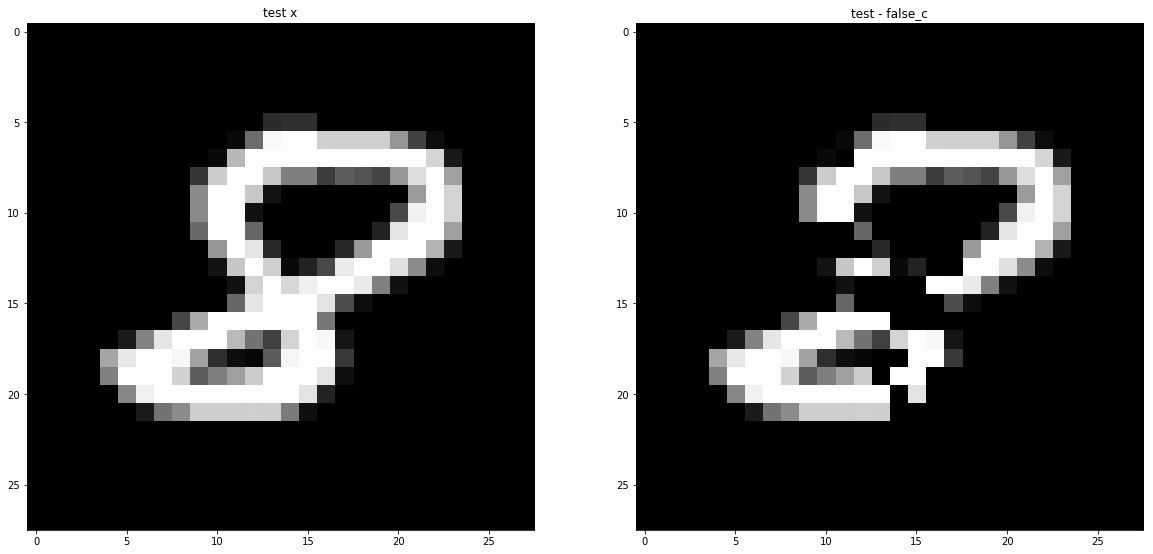

test x
8
0.9851680582636301
test - false_c
2
0.4435463278763326
////////////
other nums


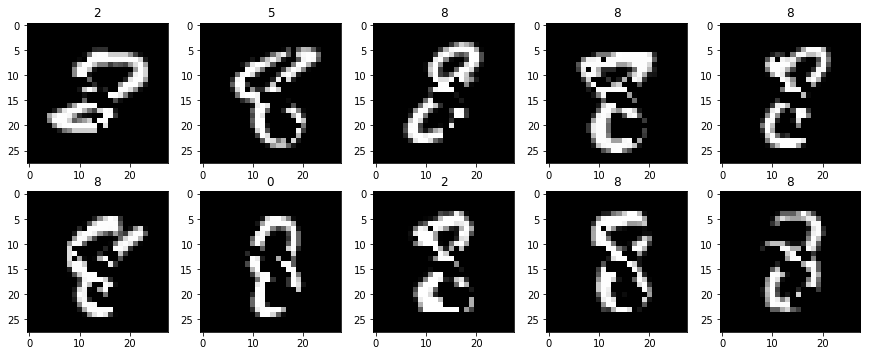

0.4
#############################
9
入力値への勾配の合計


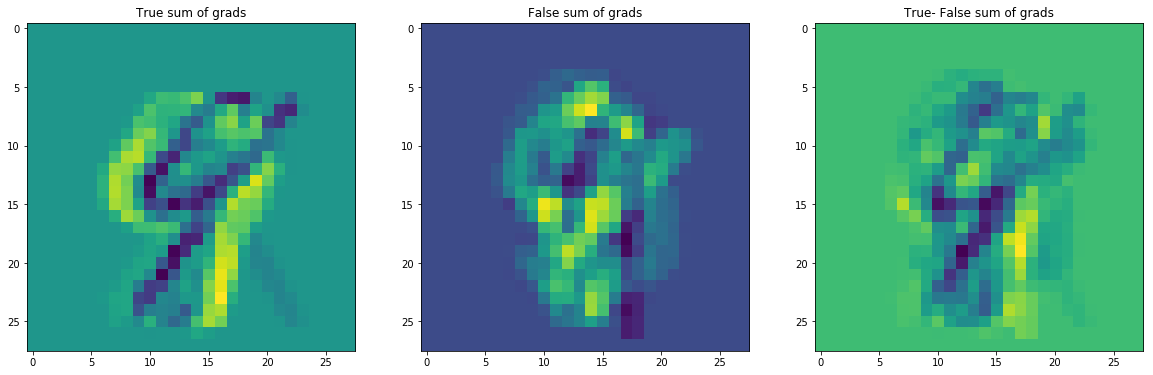

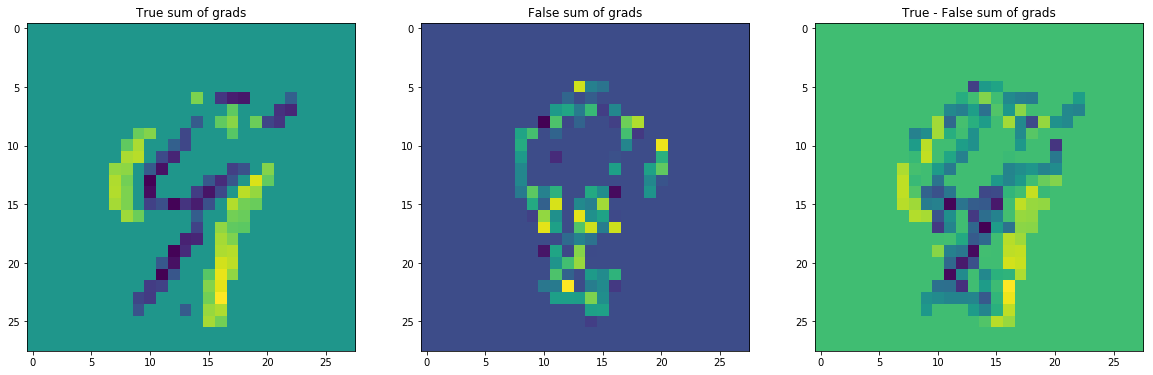

5
0.9599851742958473
5
0.2126791040057732
5
0.9616785635569397


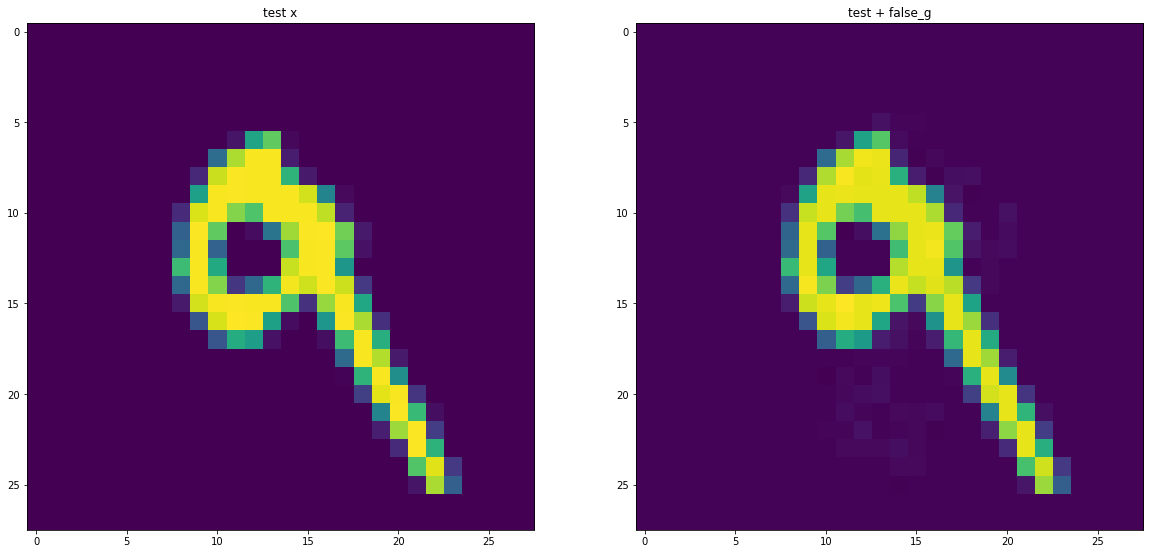

test x
9
0.9914236600584703
test + false_g
9
0.9912241440451575
--------------------------
関わった入力値への回数


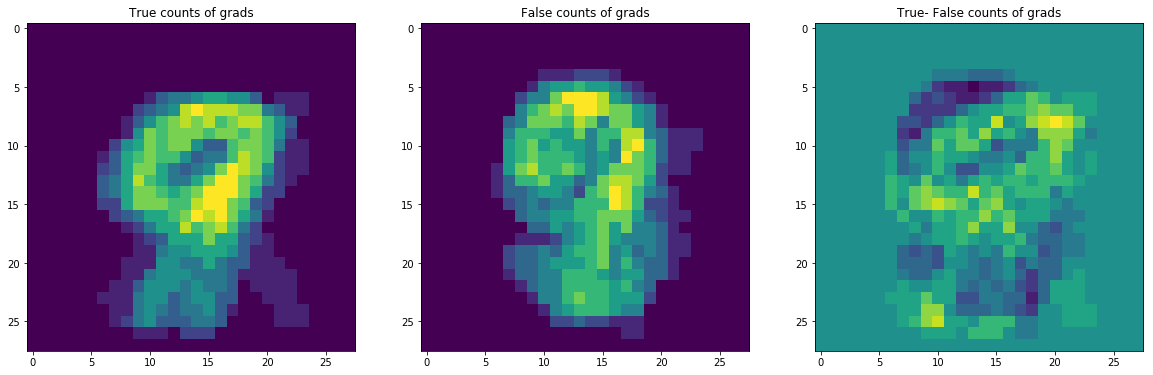

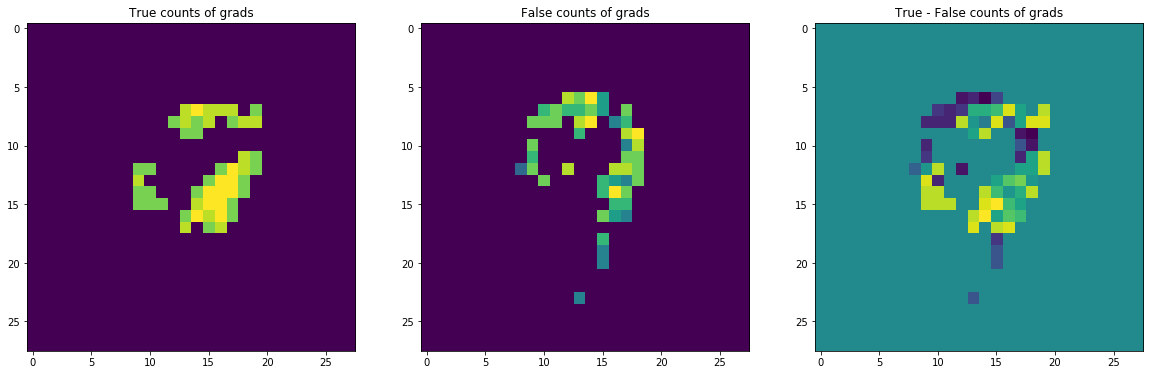

9
1.0
7
0.6533934669445222
9
1.0


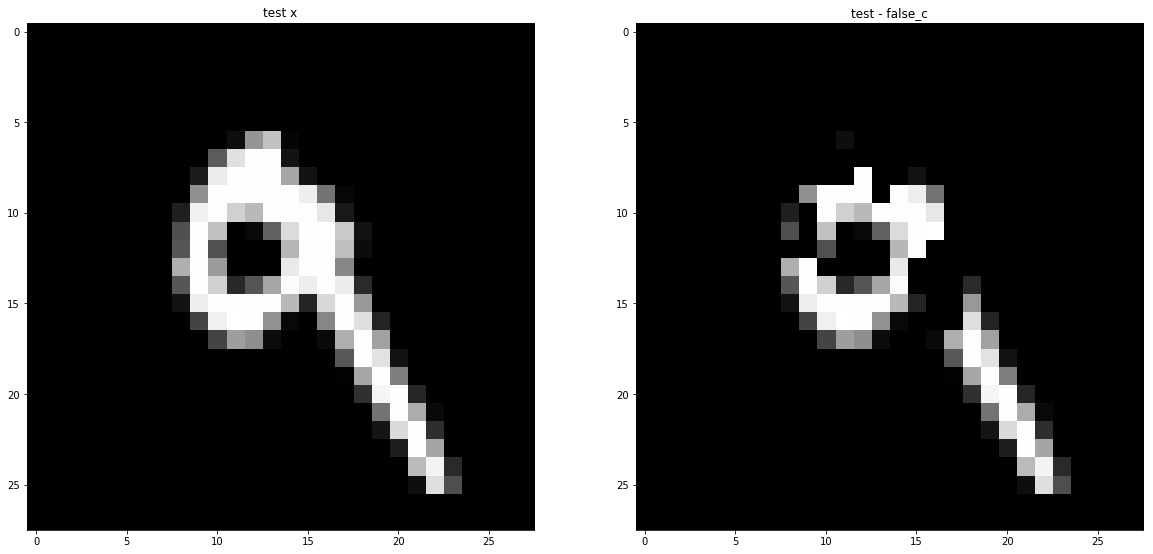

test x
9
0.9914236600584703
test - false_c
2
0.4462882394635247
////////////
other nums


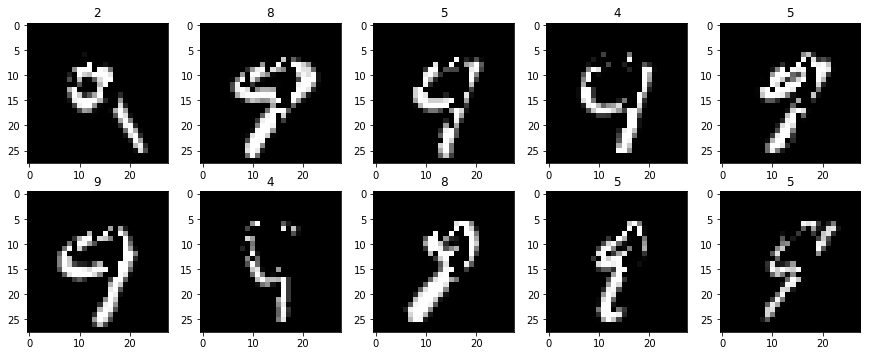

0.9
#############################


In [36]:
for i in range(10):
    print(i)
    true_nums = true_list[i][:10]
    false_nums = false_list[i][:10]
    
    print("入力値への勾配の合計")
    
    t_img_g, f_img_g = compare_g_x(true_nums, false_nums, i)
    
    pre_t_g = network.predict(t_img_g)
    print(np.argmax(pre_t_g))
    print(max(softmax(pre_t_g)))
    
    pre_f_g = network.predict(f_img_g)
    print(np.argmax(pre_f_g))
    print(max(softmax(pre_f_g)))
    
    pre_tf_g = network.predict(t_img_g - f_img_g)
    print(np.argmax(pre_tf_g))
    print(max(softmax(pre_tf_g)))
    
    fig1 = plt.figure(figsize=(20, 20))

    ax1 = fig1.add_subplot(1, 2, 1)
    ax2 = fig1.add_subplot(1, 2, 2)
    ax1.set_title("test x")
    ax1.imshow(x_test[true_nums[0]].reshape(28,28))
    ax2.set_title("test + false_g")
    ax2.imshow((x_test[true_nums[0]]+f_img_g).reshape(28,28))
    plt.show()
    
    print("test x")
    print(np.argmax(softmax(network.predict(x_test[true_nums[0]]))))
    print(max(softmax(network.predict(x_test[true_nums[0]]))))
    
    print("test + false_g")
    print(np.argmax(softmax(network.predict(x_test[true_nums[0]]+f_img_g))))
    print(max(softmax(network.predict(x_test[true_nums[0]]+f_img_g))))
    
    print("--------------------------")
    
    print("関わった入力値への回数")
    
    t_img_c, f_img_c = compare_c_x(true_nums, false_nums, i)
    
    f_img_c = (f_img_c != 0)
#     print(f_img_c)
#     print(x_test[true_nums[0]]-f_img_c)
    
    pre_t_c = network.predict(t_img_c)
    print(np.argmax(pre_t_c))
    print(max(softmax(pre_t_c)))
    
    pre_f_c = network.predict(f_img_c)
    print(np.argmax(pre_f_c))
    print(max(softmax(pre_f_c)))
    
    pre_tf_c = network.predict(t_img_c - f_img_c)
    print(np.argmax(pre_tf_c))
    print(max(softmax(pre_tf_c)))
    
    adv = x_test[true_nums[0]]-f_img_c
    adv = adv.clip(min=0)
    
    fig2 = plt.figure(figsize=(20, 20))

    ax1 = fig2.add_subplot(1, 2, 1)
    ax2 = fig2.add_subplot(1, 2, 2)
    ax1.set_title("test x")
    ax1.imshow(x_test[true_nums[0]].reshape(28,28), 'gray')
    ax2.set_title("test - false_c")
    ax2.imshow(adv.reshape(28,28), 'gray')
    plt.show()
    
    print("test x")
    print(np.argmax(softmax(network.predict(x_test[true_nums[0]]))))
    print(max(softmax(network.predict(x_test[true_nums[0]]))))
    
    print("test - false_c")
    print(np.argmax(softmax(network.predict(adv))))
    print(max(softmax(network.predict(adv))))
    
    print("////////////")
    print("other nums")
    
    print(check_miss(true_nums, f_img_c, i))
    
    print("#############################")
    
    